In [1]:
import io
import pandas as pd
import numpy as np

In [5]:
job = '_trim_eletters'
infiles = ["CPAE1","CPAE2","CPAE3","CPAJ1","CPAJ2","CPAJ3","CPME1","CPME2","CPME3","CPMJ1","CPMJ2","CPMJ3","CPPE1","CPPE2","CPPE3","CPPJ1","CPPJ2","LLAE1","LLAE2","LLAE3","LLAJ1","LLAJ2","LLAJ3","LLME1","LLME2","LLME3","LLMJ1","LLMJ2","LLMJ3"]
for infile in infiles:

    #sbatch submission script header
    script = 'script_' + infile + job + '.sh'
    outfile = io.open(script,'w', newline='\n') 
     
    outfile.write('#!/bin/bash\n\n#SBATCH --job-name='+infile+job+'\n')
    outfile.write('#SBATCH --mem=12G\n')
    outfile.write('#SBATCH --ntasks=4\n')
    outfile.write('#SBATCH --time=24:00:00 ## 1 week\n')
    outfile.write('#SBATCH -e '+infile+job+'_%A_%a.err ##error file if you want one (will be per job)\n')
    outfile.write('#SBATCH --mail-user=jmcgirr@email.unc.edu ##email you when job starts,ends,etc\n#SBATCH --mail-type=ALL\n\n')
  
    #sbatch command
    outfile.write('module load trim_galore \n')
    outfile.write('trim_galore -q 20 --paired --illumina /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/eletters/raw_fastqs/'+ infile + '_R1_001.fastq /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/eletters/raw_fastqs/'+ infile + '_R2_001.fastq \n') 
    
    #run sbatch submission 
    outfile.write('\n\n#command to run it on longleaf is sbatch '+script)
    outfile.close()

In [8]:
job = 'create_genome_dir'

#sbatch submission script header
script = 'script_' + job + '.sh'
outfile = io.open(script,'w', newline='\n')    
outfile.write('#!/bin/bash\n\n#SBATCH --job-name='+job+'\n')
outfile.write('#SBATCH --mem=16G\n')
outfile.write('#SBATCH --ntasks=4\n')
outfile.write('#SBATCH --time=24:00:00 ##\n')
outfile.write('#SBATCH -e '+job+'_%A_%a.err ##error file if you want one (will be per job)\n')
outfile.write('#SBATCH --mail-user=jmcgirr@email.unc.edu ##email you when job starts,ends,etc\n#SBATCH --mail-type=ALL\n\n')
 
#sbatch command
outfile.write('module load star \n')
outfile.write('star --runThreadN 4 \ \n')
outfile.write('--runMode genomeGenerate \ \n')
outfile.write('--genomeDir /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/genome_dir \ \n')
outfile.write('--genomeFastaFiles /proj/cmarlab/users/joe/Cyprinodon/bronto/asm.racon.fasta \ \n')
outfile.write('--sjdbOverhang 149 \n')

#run sbatch submission 
outfile.write('\n\n#command to run it on longleaf is sbatch '+script)
outfile.close()


In [23]:
job = '_align_rna'
#eletters
infiles = ["CPAE1","CPAE2","CPAE3","CPAJ1","CPAJ2","CPAJ3","CPME1","CPME2","CPME3","CPMJ1","CPMJ2","CPMJ3","CPPE1","CPPE2","CPPE3","CPPJ1","CPPJ2","LLAE1","LLAE2","LLAE3","LLAJ1","LLAJ2","LLAJ3","LLME1","LLME2","LLME3","LLMJ1","LLMJ2","LLMJ3"]
trim_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/eletters/trimmed_fastqs/"
sam_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/eletters/sams/"
##2018 round 1
#infiles = ["CAE1","CAE2","CAE3","CAE4","CAE5","CAT1","CAT2","CAT3","CPE1","CPE2","CPE3","CPE4","CPE5","CPT1","CPT2","CVT1","CVT2","CVT3","CWT1","CWT2","CWT3","CXT1","CXT2","CXT3","LFT1","LFT2","LFT3","LIT1","LIT2","LIT3","LPE1","LPE2","LPE3","LPE4","LPE5","NAT1","NAT2","NAT3","NCE1","NCE2","NCE3","NCE4","NCE5","NCT1","NCT2","NCT3","OAE1","OAE2","OAE3","OAE4","OAE5","OAT1","OAT2","OME1","OME2","OME3","OME4","OME5","OMT1","OMT2","OMT3","OPE1","OPE2","OPE3","OPE4","OPE5","OPT1","OPT2","OPT3","ORE1","ORE2","ORE3","ORE4","ORE5","ORT1","ORT2","ORT3","OVT1","OVT2","OVT3","OYE1","OYE2","OYE3","OYE4","OYE5","OYT1","OYT2","OYT3","PAT1","PAT2","PAT3"]
#trim_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/rna_2018/round_1/trimmed_fastqs/"
#sam_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/rna_2018/round_1/sams/"
##2018 round 2
#infiles = ["CME1","CME2","CME5","CMT1","CMT2","CMT3","CPT3","CPU1","CPU3","CPU5","CQE1","CQE2","CQE3","CQT1","CQT2","CUT1","CUT2","CUT3","CVE1","CVE2","CVE5","CWE2","CWE3","CWE4","CXE2","CXE3","CXE4","LFE2","LFE3","LFE4","LGE3","LGE4","LGE5","LGT1","LGT2","LGT3","LIE2","LIE3","LIE5","LKE1","LKE2","LKE3","LKT1","LKT2","LKT3","NAE1","NAE2","NAE4","OAT3","OUE1","OUE3","OUE4","OUT1","OUT2","OUT3","OVE1","OVE4","OVE5","OXE2","OXT1","OXT2","OXT3","OZE2","OZE4","OZE5","OZT1","OZT2","OZT3","PAE1","PAE2","PAE5"]
#trim_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/rna_2018/round_2/trimmed_fastqs/merged/"
#sam_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/rna_2018/round_2/sams/"

for infile in infiles:
    
    #sbatch submission script header
    script = 'script_' + infile + job + '.sh'
    outfile = io.open(script,'w', newline='\n') 
     
    outfile.write('#!/bin/bash\n\n#SBATCH --job-name='+infile+job+'\n')
    outfile.write('#SBATCH --mem=32G\n')
    outfile.write('#SBATCH --ntasks=4\n')
    outfile.write('#SBATCH --time=48:00:00 ## \n')
    outfile.write('#SBATCH -e '+infile+job+'_%A_%a.err ##error file if you want one (will be per job)\n')
    outfile.write('#SBATCH --mail-user=jmcgirr@email.unc.edu ##email you when job starts,ends,etc\n#SBATCH --mail-type=ALL\n\n')
    
    outfile.write('module load star \n')
    outfile.write('STAR --runThreadN 4 \\\n')
    outfile.write('--genomeDir /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/genome_dir \\\n')
    outfile.write('--readFilesIn '+trim_dir + infile +'_R1_001_val_1.fq '+trim_dir + infile +'_R2_001_val_2.fq \\\n')
    outfile.write('--outFileNamePrefix ' +sam_dir + infile+ ' \\ \n') 
    outfile.write('--outSAMtype BAM SortedByCoordinate \n')
    
    #run sbatch submission 
    outfile.write('\n\n#command to run it on longleaf is sbatch '+script)
    outfile.close()

In [7]:
job = '_samtobam'
#eletters
infiles = ["CPAE1","CPAE2","CPAE3","CPAJ1","CPAJ2","CPAJ3","CPME1","CPME2","CPME3","CPMJ1","CPMJ2","CPMJ3","CPPE1","CPPE2","CPPE3","CPPJ1","CPPJ2","LLAE1","LLAE2","LLAE3","LLAJ1","LLAJ2","LLAJ3","LLME1","LLME2","LLME3","LLMJ1","LLMJ2","LLMJ3"]
bam_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/eletters/bams/"
sam_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/eletters/sams/"
##2018 round 1
#infiles = ["CAE1","CAE2","CAE3","CAE4","CAE5","CAT1","CAT2","CAT3","CPE1","CPE2","CPE3","CPE4","CPE5","CPT1","CPT2","CVT1","CVT2","CVT3","CWT1","CWT2","CWT3","CXT1","CXT2","CXT3","LFT1","LFT2","LFT3","LIT1","LIT2","LIT3","LPE1","LPE2","LPE3","LPE4","LPE5","NAT1","NAT2","NAT3","NCE1","NCE2","NCE3","NCE4","NCE5","NCT1","NCT2","NCT3","OAE1","OAE2","OAE3","OAE4","OAE5","OAT1","OAT2","OME1","OME2","OME3","OME4","OME5","OMT1","OMT2","OMT3","OPE1","OPE2","OPE3","OPE4","OPE5","OPT1","OPT2","OPT3","ORE1","ORE2","ORE3","ORE4","ORE5","ORT1","ORT2","ORT3","OVT1","OVT2","OVT3","OYE1","OYE2","OYE3","OYE4","OYE5","OYT1","OYT2","OYT3","PAT1","PAT2","PAT3"]
#bam_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/rna_2018/round_1/bams/"
#sam_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/rna_2018/round_1/sams/"
##2018 round 2
#infiles = ["CME1","CME2","CME5","CMT1","CMT2","CMT3","CPT3","CPU1","CPU3","CPU5","CQE1","CQE2","CQE3","CQT1","CQT2","CUT1","CUT2","CUT3","CVE1","CVE2","CVE5","CWE2","CWE3","CWE4","CXE2","CXE3","CXE4","LFE2","LFE3","LFE4","LGE3","LGE4","LGE5","LGT1","LGT2","LGT3","LIE2","LIE3","LIE5","LKE1","LKE2","LKE3","LKT1","LKT2","LKT3","NAE1","NAE2","NAE4","OAT3","OUE1","OUE3","OUE4","OUT1","OUT2","OUT3","OVE1","OVE4","OVE5","OXE2","OXT1","OXT2","OXT3","OZE2","OZE4","OZE5","OZT1","OZT2","OZT3","PAE1","PAE2","PAE5"]
#bam_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/rna_2018/round_2/bams/"
#sam_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/rna_2018/round_2/sams/"


for infile in infiles:
    
    #sbatch submission script header
    script = 'script_' + infile + job + '.sh'
    outfile = io.open(script,'w', newline='\n') 
     
    outfile.write('#!/bin/bash\n\n#SBATCH --job-name='+infile+job+'\n')
    outfile.write('#SBATCH --mem=32G\n')
    outfile.write('#SBATCH --ntasks=4\n')
    outfile.write('#SBATCH --time=24:00:00 ## \n')
    outfile.write('#SBATCH -e '+infile+job+'_%A_%a.err ##error file if you want one (will be per job)\n')
    outfile.write('#SBATCH --mail-user=jmcgirr@email.unc.edu ##email you when job starts,ends,etc\n#SBATCH --mail-type=ALL\n\n')
    
    outfile.write('module load samtools \n')
    outfile.write('samtools view -Sb '+ sam_dir + infile + 'Aligned.out.sam > '+bam_dir + infile +'.rna.bam \n') 
    outfile.write('samtools sort '+bam_dir + infile +'.rna.bam -o '+bam_dir + infile +'.rna.sort.bam \n') 
    outfile.write('samtools index '+bam_dir + infile +'.rna.sort.bam \n') 

    #run sbatch submission 
    outfile.write('\n\n#command to run it on longleaf is sbatch '+script)
    outfile.close()

In [4]:
#use bcftools to call snps instead of gatk
#bcftools mpileup --threads 16 --skip-indels -f /proj/cmarlab/users/joe/Cyprinodon/bronto/asm.racon.fasta -b rna_bam_list.txt -o /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/raw_variants/all_rna_raw_variants_mpileup_threads_snps_only.vcf
#bcftools call -mv -Ob --threads 16 -o all_rna_raw_variants_mpileup_threads_calls.bcf



job = '_callsnps'
#eletters
infiles = ["CPAE1","CPAE2","CPAE3","CPAJ1","CPAJ2","CPAJ3","CPME1","CPME2","CPME3","CPMJ1","CPMJ2","CPMJ3","CPPE1","CPPE2","CPPE3","CPPJ1","CPPJ2","LLAE1","LLAE2","LLAE3","LLAJ1","LLAJ2","LLAJ3","LLME1","LLME2","LLME3","LLMJ1","LLMJ2","LLMJ3"]
bam_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/eletters/bams/"
##2018 round 1
#infiles = ["CAE1","CAE2","CAE3","CAE4","CAE5","CAT1","CAT2","CAT3","CPE1","CPE2","CPE3","CPE4","CPE5","CPT1","CPT2","CVT1","CVT2","CVT3","CWT1","CWT2","CWT3","CXT1","CXT2","CXT3","LFT1","LFT2","LFT3","LIT1","LIT2","LIT3","LPE1","LPE2","LPE3","LPE4","LPE5","NAT1","NAT2","NAT3","NCE1","NCE2","NCE3","NCE4","NCE5","NCT1","NCT2","NCT3","OAE1","OAE2","OAE3","OAE4","OAE5","OAT1","OAT2","OME1","OME2","OME3","OME4","OME5","OMT1","OMT2","OMT3","OPE1","OPE2","OPE3","OPE4","OPE5","OPT1","OPT2","OPT3","ORE1","ORE2","ORE3","ORE4","ORE5","ORT1","ORT2","ORT3","OVT1","OVT2","OVT3","OYE1","OYE2","OYE3","OYE4","OYE5","OYT1","OYT2","OYT3","PAT1","PAT2","PAT3"]
#bam_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/rna_2018/round_1/bams/"
##2018 round 2
#infiles = ["CME1","CME2","CME5","CMT1","CMT2","CMT3","CPT3","CPU1","CPU3","CPU5","CQE1","CQE2","CQE3","CQT1","CQT2","CUT1","CUT2","CUT3","CVE1","CVE2","CVE5","CWE2","CWE3","CWE4","CXE2","CXE3","CXE4","LFE2","LFE3","LFE4","LGE3","LGE4","LGE5","LGT1","LGT2","LGT3","LIE2","LIE3","LIE5","LKE1","LKE2","LKE3","LKT1","LKT2","LKT3","NAE1","NAE2","NAE4","OAT3","OUE1","OUE3","OUE4","OUT1","OUT2","OUT3","OVE1","OVE4","OVE5","OXE2","OXT1","OXT2","OXT3","OZE2","OZE4","OZE5","OZT1","OZT2","OZT3","PAE1","PAE2","PAE5"]
#bam_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/rna_2018/round_2/bams/"

var_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/raw_variants/"

for infile in infiles:
    
    #sbatch submission script header
    script = 'script_' + infile + job + '.sh'
    outfile = io.open(script,'w', newline='\n') 
     
    outfile.write('#!/bin/bash\n\n#SBATCH --job-name='+infile+job+'\n')
    outfile.write('#SBATCH --mem=32G\n')
    outfile.write('#SBATCH --ntasks=4\n')
    outfile.write('#SBATCH --time=24:00:00 ## \n')
    outfile.write('#SBATCH -e '+infile+job+'_%A_%a.err ##error file if you want one (will be per job)\n')
    outfile.write('#SBATCH --mail-user=jmcgirr@email.unc.edu ##email you when job starts,ends,etc\n#SBATCH --mail-type=ALL\n\n')
    
    outfile.write('module load java \n')
    outfile.write('java -jar /proj/cmarlab/users/joe/picard.jar AddOrReplaceReadGroups I='+bam_dir+infile+'.rna.sort.bam O='+bam_dir+infile+'.rna.sort.RG.bam RGLB=lib1 RGPL=illumina RGPU=unit1 RGSM=20 \n')
    outfile.write('module load samtools \n')
    outfile.write('samtools index '+bam_dir+infile+'.rna.sort.RG.bam \n')
    outfile.write('module load gatk/3.8-0 \n')
    outfile.write('gatk -T SplitNCigarReads -R /proj/cmarlab/users/joe/Cyprinodon/bronto/asm.racon.fasta -I '+bam_dir+infile+'.rna.sort.RG.bam -o '+bam_dir+infile+'.rna.sort.RG.split.bam -rf ReassignOneMappingQuality -RMQF 255 -RMQT 60 -U ALLOW_N_CIGAR_READS \n')
    outfile.write('module load samtools \n')
    outfile.write('samtools index '+bam_dir+infile+'.rna.sort.RG.split.bam \n')
    outfile.write('module load gatk/3.8-0 \n')
    outfile.write('gatk -T HaplotypeCaller -ERC GVCF -drf DuplicateRead -R /proj/cmarlab/users/joe/Cyprinodon/bronto/asm.racon.fasta -I '+bam_dir+infile+'.rna.sort.RG.split.bam -dontUseSoftClippedBases -stand_call_conf 20.0 -nct 4 -o '+var_dir+infile+'_raw_variants.g.vcf \n')

    #run sbatch submission 
    outfile.write('\n\n#command to run it on longleaf is sbatch '+script)
    outfile.close()

In [12]:
job = '_stringtie'

#eletters
infiles = ["CPAE1","CPAE2","CPAE3","CPAJ1","CPAJ2","CPAJ3","CPME1","CPME2","CPME3","CPMJ1","CPMJ2","CPMJ3","CPPE1","CPPE2","CPPE3","CPPJ1","CPPJ2","LLAE1","LLAE2","LLAE3","LLAJ1","LLAJ2","LLAJ3","LLME1","LLME2","LLME3","LLMJ1","LLMJ2","LLMJ3"]
bam_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/eletters/bams/"
##2018 round 1
infiles = ["CAE1","CAE2","CAE3","CAE4","CAE5","CAT1","CAT2","CAT3","CPE1","CPE2","CPE3","CPE4","CPE5","CPT1","CPT2","CVT1","CVT2","CVT3","CWT1","CWT2","CWT3","CXT1","CXT2","CXT3","LFT1","LFT2","LFT3","LIT1","LIT2","LIT3","LPE1","LPE2","LPE3","LPE4","LPE5","NAT1","NAT2","NAT3","NCE1","NCE2","NCE3","NCE4","NCE5","NCT1","NCT2","NCT3","OAE1","OAE2","OAE3","OAE4","OAE5","OAT1","OAT2","OME1","OME2","OME3","OME4","OME5","OMT1","OMT2","OMT3","OPE1","OPE2","OPE3","OPE4","OPE5","OPT1","OPT2","OPT3","ORE1","ORE2","ORE3","ORE4","ORE5","ORT1","ORT2","ORT3","OVT1","OVT2","OVT3","OYE1","OYE2","OYE3","OYE4","OYE5","OYT1","OYT2","OYT3","PAT1","PAT2","PAT3"]
bam_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/rna_2018/round_1/bams/"
##2018 round 2
infiles = ["CME1","CME2","CME5","CMT1","CMT2","CMT3","CPT3","CPU1","CPU3","CPU5","CQE1","CQE2","CQE3","CQT1","CQT2","CUT1","CUT2","CUT3","CVE1","CVE2","CVE5","CWE2","CWE3","CWE4","CXE2","CXE3","CXE4","LFE2","LFE3","LFE4","LGE3","LGE4","LGE5","LGT1","LGT2","LGT3","LIE2","LIE3","LIE5","LKE1","LKE2","LKE3","LKT1","LKT2","LKT3","NAE1","NAE2","NAE4","OAT3","OUE1","OUE3","OUE4","OUT1","OUT2","OUT3","OVE1","OVE4","OVE5","OXE2","OXT1","OXT2","OXT3","OZE2","OZE4","OZE5","OZT1","OZT2","OZT3","PAE1","PAE2","PAE5"]
bam_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/rna_2018/round_2/bams/"

gtf_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/gtfs/"

for infile in infiles:
    
    #sbatch submission script header
    script = 'script_' + infile + job + '.sh'
    outfile = io.open(script,'w', newline='\n') 
     
    outfile.write('#!/bin/bash\n\n#SBATCH --job-name='+infile+job+'\n')
    outfile.write('#SBATCH --mem=16G\n')
    outfile.write('#SBATCH --ntasks=4\n')
    outfile.write('#SBATCH --time=24:00:00 ## \n')
    outfile.write('#SBATCH -e '+infile+job+'_%A_%a.err ##error file if you want one (will be per job)\n')
    outfile.write('#SBATCH --mail-user=jmcgirr@email.unc.edu ##email you when job starts,ends,etc\n#SBATCH --mail-type=ALL\n\n')
    
    outfile.write('module load stringtie \n')
    outfile.write('stringtie '+bam_dir+infile+'.rna.sort.bam -p 4 -l '+infile+' -o '+gtf_dir+infile+'.gtf \n')
    
    #run sbatch submission 
    outfile.write('\n\n#command to run it on longleaf is sbatch '+script)
    outfile.close()

In [10]:
job = '_bam2fasta'

#eletters
infiles = ["CPAE1","CPAE2","CPAE3","CPAJ1","CPAJ2","CPAJ3","CPME1","CPME2","CPME3","CPMJ1","CPMJ2","CPMJ3","CPPE1","CPPE2","CPPE3","CPPJ1","CPPJ2","LLAE1","LLAE2","LLAE3","LLAJ1","LLAJ2","LLAJ3","LLME1","LLME2","LLME3","LLMJ1","LLMJ2","LLMJ3"]
bam_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/eletters/bams/"
##2018 round 1
#infiles = ["CAE1","CAE2","CAE3","CAE4","CAE5","CAT1","CAT2","CAT3","CPE1","CPE2","CPE3","CPE4","CPE5","CPT1","CPT2","CVT1","CVT2","CVT3","CWT1","CWT2","CWT3","CXT1","CXT2","CXT3","LFT1","LFT2","LFT3","LIT1","LIT2","LIT3","LPE1","LPE2","LPE3","LPE4","LPE5","NAT1","NAT2","NAT3","NCE1","NCE2","NCE3","NCE4","NCE5","NCT1","NCT2","NCT3","OAE1","OAE2","OAE3","OAE4","OAE5","OAT1","OAT2","OME1","OME2","OME3","OME4","OME5","OMT1","OMT2","OMT3","OPE1","OPE2","OPE3","OPE4","OPE5","OPT1","OPT2","OPT3","ORE1","ORE2","ORE3","ORE4","ORE5","ORT1","ORT2","ORT3","OVT1","OVT2","OVT3","OYE1","OYE2","OYE3","OYE4","OYE5","OYT1","OYT2","OYT3","PAT1","PAT2","PAT3"]
#bam_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/rna_2018/round_1/bams/"
##2018 round 2
#infiles = ["CME1","CME2","CME5","CMT1","CMT2","CMT3","CPT3","CPU1","CPU3","CPU5","CQE1","CQE2","CQE3","CQT1","CQT2","CUT1","CUT2","CUT3","CVE1","CVE2","CVE5","CWE2","CWE3","CWE4","CXE2","CXE3","CXE4","LFE2","LFE3","LFE4","LGE3","LGE4","LGE5","LGT1","LGT2","LGT3","LIE2","LIE3","LIE5","LKE1","LKE2","LKE3","LKT1","LKT2","LKT3","NAE1","NAE2","NAE4","OAT3","OUE1","OUE3","OUE4","OUT1","OUT2","OUT3","OVE1","OVE4","OVE5","OXE2","OXT1","OXT2","OXT3","OZE2","OZE4","OZE5","OZT1","OZT2","OZT3","PAE1","PAE2","PAE5"]
#bam_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/rna_2018/round_2/bams/"

fasta_dir = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/fastas/"

for infile in infiles:
    
    #sbatch submission script header
    script = 'script_' + infile + job + '.sh'
    outfile = io.open(script,'w', newline='\n') 
     
    outfile.write('#!/bin/bash\n\n#SBATCH --job-name='+infile+job+'\n')
    outfile.write('#SBATCH --mem=8G\n')
    outfile.write('#SBATCH --ntasks=4\n')
    outfile.write('#SBATCH --time=24:00:00 ## \n')
    outfile.write('#SBATCH -e '+infile+job+'_%A_%a.err ##error file if you want one (will be per job)\n')
    outfile.write('#SBATCH --mail-user=jmcgirr@email.unc.edu ##email you when job starts,ends,etc\n#SBATCH --mail-type=ALL\n\n')
    
    outfile.write('module load samtools \n')
    outfile.write('samtools fasta '+bam_dir+infile+'.rna.sort.bam > '+fasta_dir+infile+'.rna.sort.fasta \n')
    
    #run sbatch submission 
    outfile.write('\n\n#command to run it on longleaf is sbatch '+script)
    outfile.close()

In [2]:
job = 'make_hdf5'
wasp_dir = '/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/'

#sbatch submission script header
script = 'script_'+ job + '.sh'
outfile = io.open(script,'w', newline='\n') 
jobname=  job
 
outfile.write('#!/bin/bash\n\n')
outfile.write('#SBATCH --job-name='+jobname+'\n')
outfile.write('#SBATCH --mem=16G\n')
outfile.write('#SBATCH --ntasks=4\n')
outfile.write('#SBATCH --time=48:00:00 ##\n')
outfile.write('#SBATCH -e '+jobname+'_%A_%a.err ##error file if you want one (will be per job)\n')
outfile.write('#SBATCH --mail-user=jmcgirr@email.unc.edu ##email you when job starts,ends,etc\n')
outfile.write('#SBATCH --mail-type=ALL\n\n')

#sbatch command
outfile.write('module load wasp \n')
outfile.write('snp2h5 --chrom /proj/cmarlab/users/joe/Cyprinodon/bronto/asm.racon.scaffold.sizes --format vcf --haplotype '+wasp_dir+'haplotypes.h5 --snp_index '+wasp_dir+'snp_index.h5 --snp_tab '+wasp_dir+'snp_tab.h5 /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/vcf/all_rna_filtered_snps_pre_wasp.reheader.vcf \n')

#run sbatch submission 
outfile.write('\n')
outfile.write('#command to run it on longleaf is sbatch '+script)

 
outfile.close()

In [4]:
job = '_find_intersecting'
wasp_dir = '/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/'
bam_dir = '/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/all_sorted_bams/'
sample_names_dir = '/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/sample_names/'
infiles = ["LKE3","LGT3","LKT3","OZT2","NAE1","CUT3","LPE2","LLAE2","LKT1","LGE3","CVE1","LKT2","LGT1","LPE3","LLMJ2","PAT1","LLAE3","LLMJ1","LPE4","LLME1","OVE4","LIE5","LGT2","LLAE1","LLME3","CUT1","LLME2","LLMJ3","LFE4","LLAJ3","PAT2","LLAJ2","LPE5","LPE1","NAE2","CUT2","LLAJ1","OUT2","LFE3","CXE2","OZT3","LKE1","LFT1","LIE2","LIT2","LFT3","CXE4","LIT3","CQE1","NCT1","LGE4","PAT3","LIT1","CQE2","CWE3","LIE3","OZT1","CXT2","OUE4","CQT2","OUT1","LFT2","OXT1","CXT1","PAE1","OVE5","LFE2","CWT1","PAE5","CXE3","PAE2","CWE2","CXT3","CWE4","OZE5","LGE5","CQE3","OXE2","CVE2","OAT3","OXT3","CQT1","OAT1","CPU3","OVT1","CWT2","ORT3","ORE4","OYT1","OXT2","OYT2","OUT3","OZE4","ORE2","OPE5","LKE2","CWT3","CPU1","ORE5","OAE2","OZE2","OME2","CPU5","OYT3","OVT3","ORT2","NCE1","OYE4","OMT1","OAE1","OYE1","OUE1","ORT1","NAE4","NCT3","ORE1","OMT3","OME4","OPT1","OUE3","OMT2","OME3","OAT2","OME5","CPT3","ORE3","NCE3","OPT3","NCE2","OVE1","OPE4","OME1","OAE5","OYE5","CPPE2","OYE3","CVT3","OVT2","OAE3","NCE4","OPT2","OAE4","OPE2","NCT2","OYE2","CPME3","CMT1","OPE1","CPPJ1","CVE5","CPPJ2","CPT2","CPT1","OPE3","CME1","CPPE1","NCE5","CAE5","CVT1","CPE5","CPE1","CPMJ1","CPMJ3","NAT2","CPPE3","CME2","CPMJ2","CPE2","CVT2","NAT1","CPME1","CAT3","CPME2","CPE4","CME5","CPAJ1","CAT1","NAT3","CAT2","CMT3","CPAJ2","CPAJ3","CPE3","CPAE3","CPAE2","CMT2","CAE4","CAE2","CAE3","CAE1","CPAE1"]

for infile in infiles:
    #sbatch submission script header
    script = 'script_'+ infile + job + '.sh'
    script_indiv = infile + '.txt'
    outfile = io.open(script,'w', newline='\n') 
    #outfile2 = io.open(script_indiv,'w', newline='\n') 
    jobname= infile + job
    
    #outfile2.write(infile)
    outfile.write('#!/bin/bash\n\n')
    outfile.write('#SBATCH --job-name='+jobname+'\n')
    outfile.write('#SBATCH --mem=32G\n')
    outfile.write('#SBATCH --ntasks=4\n')
    outfile.write('#SBATCH --time=24:00:00 ##\n')
    outfile.write('#SBATCH -e '+jobname+'_%A_%a.err ##error file if you want one (will be per job)\n')
    outfile.write('#SBATCH --mail-user=jmcgirr@email.unc.edu ##email you when job starts,ends,etc\n')
    outfile.write('#SBATCH --mail-type=ALL\n\n')
    
    #sbatch command
    outfile.write('module load wasp \n')
    outfile.write('module load python \n')
    outfile.write('python3 /nas/longleaf/apps/wasp/2018-07/WASP/mapping/find_intersecting_snps.py --is_paired_end --is_sorted --output_dir '+wasp_dir+'find_intersecting_snps --snp_tab '+wasp_dir+'snp_tab.h5 --snp_index '+wasp_dir+'snp_index.h5 --haplotype '+wasp_dir+'haplotypes.h5 --samples '+sample_names_dir+infile+'.txt '+bam_dir+infile+'.rna.sort.bam \n')
    outfile.write('gzip -d '+wasp_dir+'find_intersecting_snps/'+infile+'.rna.sort.remap.fq1.gz \n') 
    outfile.write('gzip -d '+wasp_dir+'find_intersecting_snps/'+infile+'.rna.sort.remap.fq2.gz \n') 
    outfile.write('module load star \n')
    outfile.write('STAR --runThreadN 4 \\\n')
    outfile.write('--genomeDir /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/genome_dir \\\n')
    outfile.write('--readFilesIn '+wasp_dir+'find_intersecting_snps/'+infile+'.rna.sort.remap.fq1 '+wasp_dir+'find_intersecting_snps/'+infile+'.rna.sort.remap.fq2 \\\n')
    outfile.write('--outFileNamePrefix '+wasp_dir+'map2/'+infile+'\n') 
    outfile.write('module load samtools \n')
    outfile.write('samtools view -b -q 10 '+wasp_dir+'map2/'+infile+'Aligned.out.sam > '+wasp_dir+'map2/'+infile+'_remapped.bam \n')
    outfile.write('samtools sort -o '+wasp_dir+'map2/'+infile+'_remapped.sort.bam '+wasp_dir+'map2/'+infile+'_remapped.bam \n')
    outfile.write('samtools index '+wasp_dir+'map2/'+infile+'_remapped.sort.bam \n')
    
    outfile.write('module load wasp \n')
    outfile.write('module load python \n')
    outfile.write('python3 /nas/longleaf/apps/wasp/2018-07/WASP/mapping/filter_remapped_reads.py '+wasp_dir+'find_intersecting_snps/'+infile+'.rna.sort.to.remap.bam '+wasp_dir+'map2/'+infile+'_remapped.sort.bam '+wasp_dir+'map2/'+infile+'.keep.to.merge.bam \n')
    outfile.write('module load samtools \n')
    outfile.write('samtools merge '+wasp_dir+'map2/'+infile+'.keep.merged.bam '+wasp_dir+'map2/'+infile+'.keep.to.merge.bam '+wasp_dir+'find_intersecting_snps/'+infile+'.rna.sort.keep.bam \n')
    outfile.write('samtools sort -o '+wasp_dir+'final_unbiased_bams/'+infile+'_filtered.merged.sort.bam '+wasp_dir+'map2/'+infile+'.keep.merged.bam \n')
    outfile.write('samtools index '+wasp_dir+'final_unbiased_bams/'+infile+'_filtered.merged.sort.bam \n')
    
    #run sbatch submission 
    outfile.write('\n#command to run it on longleaf is sbatch '+script)
    
    #outfile2.close() 
    outfile.close()

In [6]:
infiles = ["1","2","3","4","5","6","7","8","9"]
job = "run_py"
for infile in infiles:
    #sbatch submission script header
    script = 'script_'+ infile + job + '.sh'
    outfile = io.open(script,'w', newline='\n') 
    jobname= infile + job
    
    outfile.write('#!/bin/bash\n\n')
    outfile.write('#SBATCH --job-name='+jobname+'\n')
    outfile.write('#SBATCH --mem=8G\n')
    outfile.write('#SBATCH --ntasks=4\n')
    outfile.write('#SBATCH --time=24:00:00 ##\n')
    outfile.write('#SBATCH -e '+jobname+'_%A_%a.err ##error file if you want one (will be per job)\n')
    outfile.write('#SBATCH --mail-user=jmcgirr@email.unc.edu ##email you when job starts,ends,etc\n')
    outfile.write('#SBATCH --mail-type=ALL\n\n')
    
    #sbatch command
    outfile.write('module load python \n')
    outfile.write('python3 run'+infile+'.py \n')
    #run sbatch submission 
    outfile.write('\n')
    outfile.write('#command to run it on longleaf is sbatch '+script)
    
     
    outfile.close()

In [3]:
job = '_allele_counts'
bams_dir = '/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/'
counts_dir = '/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/allele_counts/'
rg_bams_dir = '/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/bams_for_phasing/'
infiles = ["CAE1","CAE2","CAE3","CAE4","CAE5","CAT1","CAT2","CAT3","CME1","CME2","CME5","CMT1","CMT2","CMT3","CPAE1","CPAE2","CPAE3","CPAJ1","CPAJ2","CPAJ3","CPE1","CPE2","CPE3","CPE4","CPE5","CPME1","CPME2","CPME3","CPMJ1","CPMJ2","CPMJ3","CPPE1","CPPE2","CPPE3","CPPJ1","CPPJ2","CPT1","CPT2","CPT3","CPU1","CPU3","CPU5","CQE1","CQE2","CQE3","CQT1","CQT2","CUT1","CUT2","CUT3","CVE1","CVE2","CVE5","CVT1","CVT2","CVT3","CWE2","CWE3","CWE4","CWT1","CWT2","CWT3","CXE2","CXE3","CXE4","CXT1","CXT2","CXT3","LFE2","LFE3","LFE4","LFT1","LFT2","LFT3","LGE3","LGE4","LGE5","LGT1","LGT2","LGT3","LIE2","LIE3","LIE5","LIT1","LIT2","LIT3","LKE1","LKE2","LKE3","LKT1","LKT2","LKT3","LLAE1","LLAE2","LLAE3","LLAJ1","LLAJ2","LLAJ3","LLME1","LLME2","LLME3","LLMJ1","LLMJ2","LLMJ3","LPE1","LPE2","LPE3","LPE4","LPE5","NAE1","NAE2","NAE4","NAT1","NAT2","NAT3","NCE1","NCE2","NCE3","NCE4","NCE5","NCT1","NCT2","NCT3","OAE1","OAE2","OAE3","OAE4","OAE5","OAT1","OAT2","OAT3","OME1","OME2","OME3","OME4","OME5","OMT1","OMT2","OMT3","OPE1","OPE2","OPE3","OPE4","OPE5","OPT1","OPT2","OPT3","ORE1","ORE2","ORE3","ORE4","ORE5","ORT1","ORT2","ORT3","OUE1","OUE3","OUE4","OUT1","OUT2","OUT3","OVE1","OVE4","OVE5","OVT1","OVT2","OVT3","OXE2","OXT1","OXT2","OXT3","OYE1","OYE2","OYE3","OYE4","OYE5","OYT1","OYT2","OYT3","OZE2","OZE4","OZE5","OZT1","OZT2","OZT3","PAE1","PAE2","PAE5","PAT1","PAT2","PAT3"]

for infile in infiles:
    
    #sbatch submission script header
    script = 'script_' + infile + job + '.sh'
    outfile = io.open(script,'w', newline='\n') 
     
    outfile.write('#!/bin/bash\n\n#SBATCH --job-name='+infile+job+'\n')
    outfile.write('#SBATCH --mem=32G\n')
    outfile.write('#SBATCH --ntasks=4\n')
    outfile.write('#SBATCH --time=24:00:00 ## \n')
    outfile.write('#SBATCH -e '+infile+job+'_%A_%a.err ##error file if you want one (will be per job)\n')
    outfile.write('#SBATCH --mail-user=jmcgirr@email.unc.edu ##email you when job starts,ends,etc\n#SBATCH --mail-type=ALL\n\n')
    
    #sbatch command
    
    outfile.write('module load java \n')
    outfile.write('java -jar /proj/cmarlab/users/joe/picard.jar AddOrReplaceReadGroups I='+bams_dir+infile+'_filtered.merged.sort.bam O='+rg_bams_dir+infile+'_filtered.merged.sort.RG.bam RGLB=lib1 RGPL=illumina RGPU=unit1 RGSM='+infile+' \n')
    outfile.write('module load samtools \n')
    outfile.write('samtools index '+rg_bams_dir+infile+'_filtered.merged.sort.RG.bam \n')
    outfile.write('module load gatk/3.8-0 \n')
    outfile.write('gatk -T SplitNCigarReads -drf DuplicateRead -rf ReassignOneMappingQuality -U ALLOW_N_CIGAR_READS -R /proj/cmarlab/users/joe/Cyprinodon/bronto/asm.racon.fasta -I '+rg_bams_dir+infile+'_filtered.merged.sort.RG.bam -o '+rg_bams_dir+infile+'_filtered.merged.sort.RG.split.bam \n')
    outfile.write('module load samtools \n')
    outfile.write('samtools index '+rg_bams_dir+infile+'_filtered.merged.sort.RG.split.bam \n')
    outfile.write('gatk -T ReadBackedPhasing -R /proj/cmarlab/users/joe/Cyprinodon/bronto/asm.racon.fasta -I '+rg_bams_dir+infile+'_filtered.merged.sort.RG.split.bam --variant /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/vcf/all_rna_wasp_unbiased_filtered_snps_final.vcf -o /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/vcf/'+infile+'_wasp_unbiased_phased.vcf --phaseQualityThresh 20.0 \n')
    outfile.write('gatk -T ASEReadCounter -R /proj/cmarlab/users/joe/Cyprinodon/bronto/asm.racon.fasta -U ALLOW_SEQ_DICT_INCOMPATIBILITY -o '+counts_dir+infile+'_counts.csv -I '+rg_bams_dir+infile+'_filtered.merged.sort.RG.split.bam -sites /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/vcf/'+infile+'_wasp_unbiased_phased.vcf \n')           
    outfile.write('#gatk -T VariantsToTable -R /proj/cmarlab/users/joe/Cyprinodon/bronto/asm.racon.fasta -V /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/vcf/'+infile+'_wasp_unbiased_phased.vcf -F CHROM -F POS -GF GT -GF HP -o '+counts_dir+infile+'_snp_table.txt')


    #run sbatch submission 
    outfile.write('\n')
    outfile.write('#command to run it on longleaf is sbatch '+script)
    
    # sort fasta dict to match bam file sort
    #java -jar /proj/cmarlab/users/joe/picard.jar SortVcf I=/proj/cmarlab/users/joe/rna_2018/vcf/162_rna_maf_0.5_maxmiss_0.9_snps.phased.vcf  O=/proj/cmarlab/users/joe/rna_2018/vcf/162_rna_maf_0.5_maxmiss_0.9_snps.phased.sort.vcf SEQUENCE_DICTIONARY=/proj/cmarlab/users/joe/rna_2018/fasta/Cyprinodon_NW_noheader.dict
  
    outfile.close() 

In [2]:
#import pandas as pd
#import numpy as np

# dictionary to match rna samples (outliers rm) with mother dna samples
#mom_dict = {"CAE1": "CAF1", "CAE2": "CAF1", "CAE3": "CAF1", "CAE4": "CAF1", "CAE5": "CAF1", "CAT1": "CAF1", "CAT2": "CAF1", "CAT3": "CAF1", "CME1": "CMF1", "CME2": "CMF1", "CME5": "CMF1", "CMT1": "CMF1", "CMT2": "CMF1", "CMT3": "CMF1", "CPE1": "CPF1", "CPE2": "CPF1", "CPE3": "CPF1", "CPE4": "CPF1", "CPE5": "CPF1", "CPT1": "CPF1", "CPT2": "CPF1", "CPT3": "CPF1", "CPU1": "CAF1", "CPU3": "CAF1", "CPU5": "CAF1", "CQE1": "CUNP", "CQE2": "CUNP", "CQE3": "CUNP", "CQT1": "CUNP", "CQT2": "CUNP", "CUT1": "CAF1", "CUT2": "CAF1", "CUT3": "CAF1", "CVE1": "CAF1", "CVE2": "CAF1", "CVE5": "CAF1", "CVT1": "CAF1", "CVT2": "CAF1", "CVT3": "CAF1", "CWE2": "CMF1", "CWE3": "CMF1", "CWE4": "CMF1", "CWT1": "CMF1", "CWT2": "CMF1", "CWT3": "CMF1", "CXE2": "CMF1", "CXE3": "CMF1", "CXE4": "CMF1", "CXT1": "CMF1", "CXT2": "CMF1", "CXT3": "CMF1", "LFE2": "CAF1", "LFE3": "CAF1", "LFE4": "CAF1", "LFT1": "CAF1", "LFT2": "CAF1", "LFT3": "CAF1", "LGE3": "CMF1", "LGE4": "CMF1", "LGT1": "CMF1", "LGT2": "CMF1", "LGT3": "CMF1", "LIE2": "OAF1", "LIE3": "OAF1", "LIE5": "OAF1", "LIT1": "OAF1", "LIT2": "OAF1", "LIT3": "OAF1", "LKE1": "OPF1", "LKE2": "OPF1", "LKE3": "OPF1", "LKT1": "OPF1", "LKT2": "OPF1", "LKT3": "OPF1", "NAE1": "NAF1", "NAE2": "NAF1", "NAE4": "NAF1", "NAT1": "NAF1", "NAT2": "NAF1", "NAT3": "NAF1", "NCE1": "NAF1", "NCE2": "NAF1", "NCE3": "NAF1", "NCE4": "NAF1", "NCE5": "NAF1", "NCT1": "NAF1", "NCT2": "NAF1", "NCT3": "NAF1", "OAE1": "OAF1", "OAE2": "OAF1", "OAE3": "OAF1", "OAE4": "OAF1", "OAT1": "OAF1", "OAT2": "OAF1", "OAT3": "OAF1", "OME1": "OMF1", "OME2": "OMF1", "OME3": "OMF1", "OME4": "OMF1", "OME5": "OMF1", "OMT1": "OMF1", "OMT2": "OMF1", "OMT3": "OMF1", "OPE1": "OPF1", "OPE2": "OPF1", "OPE3": "OPF1", "OPE4": "OPF1", "OPE5": "OPF1", "OPT1": "OPF1", "OPT2": "OPF1", "OPT3": "OPF1", "OUE1": "OAF1", "OUE3": "OAF1", "OUE4": "OAF1", "OUT1": "OAF1", "OUT2": "OAF1", "OUT3": "OAF1", "OVE1": "OAF1", "OVE4": "OAF1", "OVE5": "OAF1", "OVT1": "OAF1", "OVT2": "OAF1", "OVT3": "OAF1", "OXE2": "OMF1", "OXT1": "OMF1", "OXT2": "OMF1", "OXT3": "OMF1", "OYE1": "OPF1", "OYE2": "OPF1", "OYE3": "OPF1", "OYE4": "OPF1", "OYE5": "OPF1", "OYT1": "OPF1", "OYT2": "OPF1", "OYT3": "OPF1", "OZE2": "OPF1", "OZE4": "OPF1", "OZE5": "OPF1", "OZT1": "OPF1", "OZT2": "OPF1", "OZT3": "OPF1", "PAE1": "CUNP", "PAE2": "CUNP", "PAE5": "CUNP", "PAT1": "CUNP", "PAT2": "CUNP", "PAT3": "CUNP"}
mom_dict = {"CAE1": "CRPA1000", "CAE2": "CRPA1000", "CAE3": "CRPA1000", "CAE4": "CRPA1000", "CAE5": "CRPA1000", "CAT1": "CRPA1000", "CAT2": "CRPA1000", "CAT3": "CRPA1000", "CME1": "CRPM1000", "CME2": "CRPM1000", "CME5": "CRPM1000", "CMT1": "CRPM1000", "CMT2": "CRPM1000", "CMT3": "CRPM1000", "CPE1": "CRPP1000", "CPE2": "CRPP1000", "CPE3": "CRPP1000", "CPE4": "CRPP1000", "CPE5": "CRPP1000", "CPT1": "CRPP1000", "CPT2": "CRPP1000", "CPT3": "CRPP1000", "CPU1": "CRPA1000", "CPU3": "CRPA1000", "CPU5": "CRPA1000", "CQE1": "CUNP10", "CQE2": "CUNP10", "CQE3": "CUNP10", "CQT1": "CUNP10", "CQT2": "CUNP10", "CUT1": "CRPA1000", "CUT2": "CRPA1000", "CUT3": "CRPA1000", "CVE1": "CRPA1000", "CVE2": "CRPA1000", "CVE5": "CRPA1000", "CVT1": "CRPA1000", "CVT2": "CRPA1000", "CVT3": "CRPA1000", "CWE2": "CRPM1000", "CWE3": "CRPM1000", "CWE4": "CRPM1000", "CWT1": "CRPM1000", "CWT2": "CRPM1000", "CWT3": "CRPM1000", "CXE2": "CRPM1000", "CXE3": "CRPM1000", "CXE4": "CRPM1000", "CXT1": "CRPM1000", "CXT2": "CRPM1000", "CXT3": "CRPM1000", "LFE2": "CRPA1000", "LFE3": "CRPA1000", "LFE4": "CRPA1000", "LFT1": "CRPA1000", "LFT2": "CRPA1000", "LFT3": "CRPA1000", "LGE3": "CRPM1000", "LGE4": "CRPM1000", "LGT1": "CRPM1000", "LGT2": "CRPM1000", "LGT3": "CRPM1000", "LIE2": "OSPA1000", "LIE3": "OSPA1000", "LIE5": "OSPA1000", "LIT1": "OSPA1000", "LIT2": "OSPA1000", "LIT3": "OSPA1000", "LKE1": "OSPP1000", "LKE2": "OSPP1000", "LKE3": "OSPP1000", "LKT1": "OSPP1000", "LKT2": "OSPP1000", "LKT3": "OSPP1000", "NAE1": "NCCA1000", "NAE2": "NCCA1000", "NAE4": "NCCA1000", "NAT1": "NCCA1000", "NAT2": "NCCA1000", "NAT3": "NCCA1000", "NCE1": "NCCA1000", "NCE2": "NCCA1000", "NCE3": "NCCA1000", "NCE4": "NCCA1000", "NCE5": "NCCA1000", "NCT1": "NCCA1000", "NCT2": "NCCA1000", "NCT3": "NCCA1000", "OAE1": "OSPA1000", "OAE2": "OSPA1000", "OAE3": "OSPA1000", "OAE4": "OSPA1000", "OAT1": "OSPA1000", "OAT2": "OSPA1000", "OAT3": "OSPA1000", "OME1": "OSPM1000", "OME2": "OSPM1000", "OME3": "OSPM1000", "OME4": "OSPM1000", "OME5": "OSPM1000", "OMT1": "OSPM1000", "OMT2": "OSPM1000", "OMT3": "OSPM1000", "OPE1": "OSPP1000", "OPE2": "OSPP1000", "OPE3": "OSPP1000", "OPE4": "OSPP1000", "OPE5": "OSPP1000", "OPT1": "OSPP1000", "OPT2": "OSPP1000", "OPT3": "OSPP1000", "OUE1": "OSPA1000", "OUE3": "OSPA1000", "OUE4": "OSPA1000", "OUT1": "OSPA1000", "OUT2": "OSPA1000", "OUT3": "OSPA1000", "OVE1": "OSPA1000", "OVE4": "OSPA1000", "OVE5": "OSPA1000", "OVT1": "OSPA1000", "OVT2": "OSPA1000", "OVT3": "OSPA1000", "OXE2": "OSPM1000", "OXT1": "OSPM1000", "OXT2": "OSPM1000", "OXT3": "OSPM1000", "OYE1": "OSPP1000", "OYE2": "OSPP1000", "OYE3": "OSPP1000", "OYE4": "OSPP1000", "OYE5": "OSPP1000", "OYT1": "OSPP1000", "OYT2": "OSPP1000", "OYT3": "OSPP1000", "OZE2": "OSPP1000", "OZE4": "OSPP1000", "OZE5": "OSPP1000", "OZT1": "OSPP1000", "OZT2": "OSPP1000", "OZT3": "OSPP1000", "PAE1": "CUNP10", "PAE2": "CUNP10", "PAE5": "CUNP10", "PAT1": "CUNP10", "PAT2": "CUNP10", "PAT3": "CUNP10"}
# all samples
# infiles = ["CAE1","CAE2","CAE3","CAE4","CAE5","CAT1","CAT2","CAT3","CME1","CME2","CME5","CMT1","CMT2","CMT3","CPE1","CPE2","CPE3","CPE4","CPE5","CPT1","CPT2","CPT3","CPU1","CPU3","CPU5","CQE1","CQE2","CQE3","CQT1","CQT2","CUT1","CUT2","CUT3","CVE1","CVE2","CVE5","CVT1","CVT2","CVT3","CWE2","CWE3","CWE4","CWT1","CWT2","CWT3","CXE2","CXE3","CXE4","CXT1","CXT2","CXT3","LFE2","LFE3","LFE4","LFT1","LFT2","LFT3","LGE3","LGE4","LGT1","LGT2","LGT3","LIE2","LIE3","LIE5","LIT1","LIT2","LIT3","LKE1","LKE2","LKE3","LKT1","LKT2","LKT3","NAE1","NAE2","NAE4","NAT1","NAT2","NAT3","NCE1","NCE2","NCE3","NCE4","NCE5","NCT1","NCT2","NCT3","OAE1","OAE2","OAE3","OAE4","OME1","OME2","OME3","OME4","OME5","OMT1","OMT2","OMT3","OPE1","OPE2","OPE3","OPE4","OPE5","OPT1","OPT2","OPT3","OUE1","OUE3","OUE4","OUT1","OUT2","OUT3","OVE1","OVE4","OVE5","OVT1","OVT2","OVT3","OXE2","OXT1","OXT2","OXT3","OYE1","OYE2","OYE3","OYE4","OYE5","OYT1","OYT2","OYT3","OZE2","OZE4","OZE5","OZT1","OZT2","OZT3","PAE1","PAE2","PAE5","PAT1","PAT2","PAT3"]
# dad double check to confirm alternatively fixed homozygous (only for hybrids)
infiles = ["CPU1","CPU3","CPU5","CUT1","CUT2","CUT3","CVE1","CVE2","CVE5","CVT1","CVT2","CVT3","CWE2","CWE3","CWE4","CWT1","CWT2","CWT3","CXE2","CXE3","CXE4","CXT1","CXT2","CXT3","LFE2","LFE3","LFE4","LFT1","LFT2","LFT3","LGE3","LGE4","LGT1","LGT2","LGT3","LIE2","LIE3","LIE5","LIT1","LIT2","LIT3","LKE1","LKE2","LKE3","LKT1","LKT2","LKT3","NAE1","NAE2","NAE4","NAT1","NAT2","NAT3","OUE1","OUE3","OUE4","OUT1","OUT2","OUT3","OVE1","OVE4","OVE5","OVT1","OVT2","OVT3","OXE2","OXT1","OXT2","OXT3","OYE1","OYE2","OYE3","OYE4","OYE5","OYT1","OYT2","OYT3","OZE2","OZE4","OZE5","OZT1","OZT2","OZT3","PAE1","PAE2","PAE5","PAT1","PAT2","PAT3"]
infiles = ["OYE5","OYT1","OYT2","OYT3","OZE2","OZE4","OZE5","OZT1","OZT2","OZT3","PAE1","PAE2","PAE5","PAT1","PAT2","PAT3"]

dad_dict = {"CPU1": "CRPM1001","CPU3": "CRPM1001","CPU5": "CRPM1001","CUT1": "CRPM1001","CUT2": "CRPM1001","CUT3": "CRPM1001","CVE1": "CRPP1001","CVE2": "CRPP1001","CVE5": "CRPP1001","CVT1": "CRPP1001","CVT2": "CRPP1001","CVT3": "CRPP1001","CWE2": "CRPP1001","CWE3": "CRPP1001","CWE4": "CRPP1001","CWT1": "CRPP1001","CWT2": "CRPP1001","CWT3": "CRPP1001","CXE2": "CRPA1003","CXE3": "CRPA1003","CXE4": "CRPA1003","CXT1": "CRPA1003","CXT2": "CRPA1003","CXT3": "CRPA1003","LFE2": "OSPA1001","LFE3": "OSPA1001","LFE4": "OSPA1001","LFT1": "OSPA1001","LFT2": "OSPA1001","LFT3": "OSPA1001","LGE3": "OSPM1001","LGE4": "OSPM1001","LGT1": "OSPM1001","LGT2": "OSPM1001","LGT3": "OSPM1001","LIE2": "CRPA1001","LIE3": "CRPA1001","LIE5": "CRPA1001","LIT1": "CRPA1001","LIT2": "CRPA1001","LIT3": "CRPA1001","LKE1": "CRPP1001","LKE2": "CRPP1001","LKE3": "CRPP1001","LKT1": "CRPP1001","LKT2": "CRPP1001","LKT3": "CRPP1001","NAE1": "CRPA1001","NAE2": "CRPA1001","NAE4": "CRPA1001","NAT1": "CRPA1001","NAT2": "CRPA1001","NAT3": "CRPA1001","OUE1": "OSPM1001","OUE3": "OSPM1001","OUE4": "OSPM1001","OUT1": "OSPM1001","OUT2": "OSPM1001","OUT3": "OSPM1001","OVE1": "OSPP1001","OVE4": "OSPP1001","OVE5": "OSPP1001","OVT1": "OSPP1001","OVT2": "OSPP1001","OVT3": "OSPP1001","OXE2": "OSPA1001","OXT1": "OSPA1001","OXT2": "OSPA1001","OXT3": "OSPA1001","OYE1": "OSPA1001","OYE2": "OSPA1001","OYE3": "OSPA1001","OYE4": "OSPA1001","OYE5": "OSPA1001","OYT1": "OSPA1001","OYT2": "OSPA1001","OYT3": "OSPA1001","OZE2": "OSPM1001","OZE4": "OSPM1001","OZE5": "OSPM1001","OZT1": "OSPM1001","OZT2": "OSPM1001","OZT3": "OSPM1001","PAE1": "CRPA1001","PAE2": "CRPA1001","PAE5": "CRPA1001","PAT1": "CRPA1001","PAT2": "CRPA1001","PAT3": "CRPA1001"}

cts_dir = 'C:/Users/jmcgirr/Documents/remote_pups/ase/allele_counts/'
snp_dir ='C:/Users/jmcgirr/Documents/remote_pups/ase/'
out_dir = 'C:/Users/jmcgirr/Documents/remote_pups/ase/parental_counts/dad_doublecheck/'
all_rna_snps = pd.read_csv(snp_dir + "rna_snp_table.txt", sep ='\t')
all_dna_snps = pd.read_csv(snp_dir + "rna_parents_filtered_snps_passed.Q20.MAF0.05.MAXMISS0.5.recode_snp_table.txt", sep ='\t')
all_dna_snps['snpIndex'] = all_dna_snps['CHROM'].astype(str) + ':' + all_dna_snps['POS'].astype(str)

for infile in infiles:

    cts = pd.read_csv(cts_dir +infile + "_counts.csv", sep = '\t')
    cts['snpIndex'] = cts['contig'].astype(str) + ':'+ cts['position'].astype(str) 
    cts = cts[['snpIndex','refAllele','altAllele','refCount', 'altCount', 'totalCount']]
    mom = mom_dict[infile] +".GT"
    snps = all_dna_snps[[mom,'snpIndex']]
    
    mom_kid = cts.merge(snps, on='snpIndex')
    mom_kid = mom_kid.join(mom_kid[mom].str.split('/', 1, expand=True).rename(columns={0:'momAllele', 1:'a2'}))
    #only analyze homozygous alleles in mom that are het in offspring
    mom_kid = mom_kid[mom_kid['momAllele'] == mom_kid['a2']]
    mom_kid = mom_kid[(mom_kid['momAllele'] == mom_kid['refAllele']) | (mom_kid['momAllele'] == mom_kid['altAllele'])]
    # set minimum coverage at site
    #mom_kid = mom_kid[(mom_kid['refCount'] >= 10) & (mom_kid['altCount'] >= 10)]
    mom_kid.loc[mom_kid['refAllele'] == mom_kid['momAllele'], 'momCount'] = mom_kid['refCount']
    mom_kid.loc[mom_kid['altAllele'] == mom_kid['momAllele'], 'momCount'] = mom_kid['altCount']
    mom_kid = mom_kid.join(mom_kid['snpIndex'].str.split(':', 1, expand=True).rename(columns={0:'chrom', 1:'position'}))
    mom_kid = mom_kid[['chrom','position','snpIndex','refAllele','altAllele','refCount','altCount','totalCount','momAllele', 'momCount']]
    
    dad = dad_dict[infile] +".GT"
    snps_dad = all_dna_snps[[dad,'snpIndex']]
    
    mom_kid['dadCount'] = mom_kid['totalCount'] - mom_kid['momCount']
    mom_kid['momAllele_is_refAllele'] = np.where(mom_kid['refAllele'] == mom_kid['momAllele'], 'yes', 'no')
    mom_kid['momAllele_is_majorAllele'] = np.where(mom_kid['momCount'] > mom_kid['dadCount'], 'yes', 'no')
    
    # dad allele doublecheck
    dad = dad_dict[infile] +".GT"
    snps_dad = all_dna_snps[[dad,'snpIndex']]
    snps_dad = snps_dad.join(snps_dad[dad].str.split('/', 1, expand=True).rename(columns={0:'dadAllelereal1', 1:'dadAllelereal2'}))
    snps_dad = snps_dad[snps_dad['dadAllelereal1'] == snps_dad['dadAllelereal2']]
    mom_kid = mom_kid.merge(snps_dad, on='snpIndex')
    mom_kid = mom_kid[(mom_kid['momAllele'] != mom_kid['dadAllelereal1']) & (mom_kid['momAllele'] != mom_kid['dadAllelereal2'])]

    
    mom_kid.to_csv(out_dir +infile+'_parental_counts.txt',index=False, sep = "\t")


In [7]:
infile

'OYE5'

In [21]:
dad_dict = {"CVE1": "CRPP1001","CVE2": "CRPP1001","CVE5": "CRPP1001","OZE2": "OSPM1001","OZE4": "OSPM1001","OZE5": "OSPM1001"}
infile = "CVE1"
dad = dad_dict[infile] +".GT"
snps_dad = all_dna_snps[[dad,'snpIndex']]

snps_dad = snps_dad.join(snps_dad[dad].str.split('/', 1, expand=True).rename(columns={0:'dadAllelereal1', 1:'dadAllelereal2'}))
#only analyze homozygous alleles in mom that are het in offspring
snps_dad = snps_dad[snps_dad['dadAllelereal1'] == snps_dad['dadAllelereal2']]
mom_kid = mom_kid.merge(snps_dad, on='snpIndex')
mom_kid = mom_kid[(mom_kid['momAllele'] != mom_kid['dadAllelereal1']) & (mom_kid['momAllele'] == mom_kid['dadAllelereal2'])]

snps_dad.head()

,CRPP1001.GT,snpIndex,dadAllelereal1,dadAllelereal2
0,C/C,HiC_scaffold_1:26712,C,C
1,./.,HiC_scaffold_1:26718,.,.
2,./.,HiC_scaffold_1:26720,.,.
3,./.,HiC_scaffold_1:26723,.,.
4,./.,HiC_scaffold_1:26748,.,.


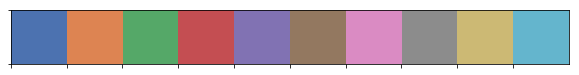

In [6]:
#import seaborn as sns
pal = sns.color_palette('deep')
pal.as_hex()
current_palette = sns.color_palette('deep')
sns.palplot(current_palette)

In [13]:
job = 'mbased_gene_'
infiles = ["CPU1","CPU3","CPU5","CUT1","CUT2","CUT3","CVE1","CVE2","CVE5","CVT1","CVT2","CVT3","CWE2","CWE3","CWE4","CWT1","CWT2","CWT3","CXE2","CXE3","CXE4","CXT1","CXT2","CXT3","LFE2","LFE3","LFE4","LFT1","LFT2","LFT3","LGE3","LGE4","LGT1","LGT2","LGT3","LIE2","LIE3","LIE5","LIT1","LIT2","LIT3","LKE1","LKE2","LKE3","LKT1","LKT2","LKT3","NAE1","NAE2","NAE4","NAT1","NAT2","NAT3","OUE1","OUE3","OUE4","OUT1","OUT2","OUT3","OVE1","OVE4","OVE5","OVT1","OVT2","OVT3","OXE2","OXT1","OXT2","OXT3","OYE1","OYE2","OYE3","OYE4","OYE5","OYT1","OYT2","OYT3","OZE2","OZE4","OZE5","OZT1","OZT2","OZT3","PAE1","PAE2","PAE5","PAT1","PAT2","PAT3"]
for infile in infiles:
    
    script = job + infile + '.R'
    outfile = io.open(script,'w', newline='\n') 
    
    outfile.write('indiv <- "'+infile+'" \n')
    outfile.write('\n#BiocManager::install("MBASED")\n#BiocManager::install("dplyr")\n#BiocManager::install("magrittr")\n#BiocManager::install("plyranges")\nlibrary("MBASED")\nlibrary("dplyr")\nlibrary("magrittr")\nlibrary("plyranges")\n\n#local\n#cts_dir <- "C:/Users/jmcgirr/Documents/remote_pups/ase/parental_counts/dad_doublecheck/"\n#cluster\nout_dir <- "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/mbased/gene_output/"\ncts_dir <- "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/allele_counts/dad_doublecheck/"\n\nase_run_type <- "gene_level"\n#ase_run_type <- "gene_snp_level"\n#ase_run_type <- "exon_level"\n#ase_run_type <- "exon_snp_level"\n\n  \nparental_cts <- read.table(paste(cts_dir, indiv, "_parental_counts.txt",sep = ""),sep = "	", stringsAsFactors = FALSE, header = TRUE)\nnrow(parental_cts)\nhead(parental_cts)\n\nparental_cts_ranges <- parental_cts\nparental_cts_ranges$seqnames <- parental_cts_ranges$chrom\nparental_cts_ranges$start <- parental_cts_ranges$position\nparental_cts_ranges$end <- parental_cts_ranges$start +1\nhead(parental_cts_ranges)\nparental_cts_ranges <- parental_cts_ranges %>% as_granges()\n\n#gene <- read.table("C:/Users/jmcgirr/Documents/remote_pups/igv/c_brontotheroides.all.renamed.putative_function.genes_only_reformated_known_final.bed", header = FALSE, stringsAsFactors = FALSE, sep = "	")\n\ngene <- read.table("/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/mbased/c_brontotheroides.all.renamed.putative_function.genes_only_reformated_known_final.bed", header = FALSE, stringsAsFactors = FALSE, sep = "	")\n#gene <- read.table("/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/mbased/c_brontotheroides.all.renamed.putative_function.exons_only_reformated_known_final.bed", header = FALSE, stringsAsFactors = FALSE, sep = "	")\n#gene <- read.table("/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/mbased/stringtie_transcoder_exons_zebrafish.bed", header = FALSE, stringsAsFactors = FALSE, sep = "	")\n\n\nnames(gene) <- c("seqnames", "start","end","GeneID", "strand")\ngene <- gene %>% as_granges()\ngene <- join_overlap_intersect(gene, parental_cts_ranges) %>% as.data.frame()\n\ngene$geneIndex <- gene$GeneID\ngene$alleleOneCount <- gene$refCount\ngene$alleleTwoCount <- gene$altCount\ngene$aseIndex <- paste(gene$geneIndex, gene$snpIndex, sep = ":")\ngene$zero_counts <- paste(gene$refCount, gene$altCount, sep= ":")\ngene <- gene %>% filter(zero_counts != "0:0")\ncts <- gene[c("geneIndex", "snpIndex","alleleOneCount","alleleTwoCount","refAllele","altAllele", "chrom","position","aseIndex")]\n\n# change aseID=cts$aseIndex to aseID=cts$geneIndex for gene/exon level ase rather than snp level\nset.seed(988482)\nmySNVs <- GRanges(\n  seqnames=cts$chrom,ranges=IRanges(start=cts$position, width=1),\n  aseID=cts$geneIndex,allele1=cts$refAllele,allele2=cts$altAllele)\nnames(mySNVs) <- cts$geneIndex\n## create input RangedSummarizedExperiment object\nmySample <- SummarizedExperiment(assays=list(\n  lociAllele1Counts=matrix(cts$alleleOneCount,ncol=1,dimnames=list(names(mySNVs),\n  "mySample")),lociAllele2Counts=matrix(cts$alleleTwoCount,ncol=1,dimnames=list(names(mySNVs),"mySample"))),rowRanges=mySNVs)\n\nASEresults_1s_haplotypesKnown <- runMBASED(\n  ASESummarizedExperiment=mySample,\n  isPhased=FALSE,\n  numSim=10^5,\n  BPPARAM = SerialParam()\n)\n\nclass(ASEresults_1s_haplotypesKnown)\nnames(assays(ASEresults_1s_haplotypesKnown))\nhead(assays(ASEresults_1s_haplotypesKnown)$majorAlleleFrequency)\nhead(assays(metadata(ASEresults_1s_haplotypesKnown)$locusSpecificResults)$allele1IsMajor)\n\nsummarizeASEResults_1s <- function(MBASEDOutput) {\n  geneOutputDF <- data.frame(\n    majorAlleleFrequency=assays(MBASEDOutput)$majorAlleleFrequency[,1],\n    #allele1IsMajor=assays(metadata(MBASEDOutput)$locusSpecificResults)$allele1IsMajor,\n    pValueASE=assays(MBASEDOutput)$pValueASE[,1],\n    pValueHeterogeneity=assays(MBASEDOutput)$pValueHeterogeneity[,1]\n  )\n  lociOutputGR <- rowRanges(metadata(MBASEDOutput)$locusSpecificResults)\n  lociOutputGR$allele1IsMajor <- assays(metadata(MBASEDOutput)$locusSpecificResults)$allele1IsMajor[,1]\n  lociOutputGR$MAF <- assays(metadata(MBASEDOutput)$locusSpecificResults)$MAF[,1]\n  lociOutputList <- split(lociOutputGR, factor(lociOutputGR$aseID, levels=unique(lociOutputGR$aseID)))\n  return(\n    list(\n      geneOutput=geneOutputDF,\n      locusOutput=lociOutputList\n    )\n  )\n}\ntail(summarizeASEResults_1s(ASEresults_1s_haplotypesKnown)$locusOutput,5)\nase <- as.data.frame(summarizeASEResults_1s(ASEresults_1s_haplotypesKnown)$geneOutput)\nase$geneID <- rownames(ase)\nhead(ase)\nwrite.table(ase,paste(out_dir,indiv,"_mbased_ase_unphased_",ase_run_type,".txt",sep = ""), quote = FALSE, row.names = FALSE, sep = "	")\n')

    outfile.close()   

In [14]:
job = 'mbased_exon_'
infiles = ["CPU1","CPU3","CPU5","CUT1","CUT2","CUT3","CVE1","CVE2","CVE5","CVT1","CVT2","CVT3","CWE2","CWE3","CWE4","CWT1","CWT2","CWT3","CXE2","CXE3","CXE4","CXT1","CXT2","CXT3","LFE2","LFE3","LFE4","LFT1","LFT2","LFT3","LGE3","LGE4","LGT1","LGT2","LGT3","LIE2","LIE3","LIE5","LIT1","LIT2","LIT3","LKE1","LKE2","LKE3","LKT1","LKT2","LKT3","NAE1","NAE2","NAE4","NAT1","NAT2","NAT3","OUE1","OUE3","OUE4","OUT1","OUT2","OUT3","OVE1","OVE4","OVE5","OVT1","OVT2","OVT3","OXE2","OXT1","OXT2","OXT3","OYE1","OYE2","OYE3","OYE4","OYE5","OYT1","OYT2","OYT3","OZE2","OZE4","OZE5","OZT1","OZT2","OZT3","PAE1","PAE2","PAE5","PAT1","PAT2","PAT3"]
for infile in infiles:
    
    script = job + infile + '.R'
    outfile = io.open(script,'w', newline='\n') 
    
    outfile.write('indiv <- "'+infile+'" \n')
    outfile.write('\n#BiocManager::install("MBASED")\n#BiocManager::install("dplyr")\n#BiocManager::install("magrittr")\n#BiocManager::install("plyranges")\nlibrary("MBASED")\nlibrary("dplyr")\nlibrary("magrittr")\nlibrary("plyranges")\n\n#local\n#cts_dir <- "C:/Users/jmcgirr/Documents/remote_pups/ase/parental_counts/dad_doublecheck/"\n#cluster\nout_dir <- "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/mbased/exon_output/"\ncts_dir <- "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/allele_counts/dad_doublecheck/"\n\n#ase_run_type <- "gene_level"\n#ase_run_type <- "gene_snp_level"\nase_run_type <- "exon_level"\n#ase_run_type <- "exon_snp_level"\n\n  \nparental_cts <- read.table(paste(cts_dir, indiv, "_parental_counts.txt",sep = ""),sep = "	", stringsAsFactors = FALSE, header = TRUE)\nnrow(parental_cts)\nhead(parental_cts)\n\nparental_cts_ranges <- parental_cts\nparental_cts_ranges$seqnames <- parental_cts_ranges$chrom\nparental_cts_ranges$start <- parental_cts_ranges$position\nparental_cts_ranges$end <- parental_cts_ranges$start +1\nhead(parental_cts_ranges)\nparental_cts_ranges <- parental_cts_ranges %>% as_granges()\n\n#gene <- read.table("C:/Users/jmcgirr/Documents/remote_pups/igv/c_brontotheroides.all.renamed.putative_function.genes_only_reformated_known_final.bed", header = FALSE, stringsAsFactors = FALSE, sep = "	")\n\n#gene <- read.table("/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/mbased/c_brontotheroides.all.renamed.putative_function.genes_only_reformated_known_final.bed", header = FALSE, stringsAsFactors = FALSE, sep = "	")\ngene <- read.table("/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/mbased/c_brontotheroides.all.renamed.putative_function.exons_only_reformated_known_final.bed", header = FALSE, stringsAsFactors = FALSE, sep = "	")\n#gene <- read.table("/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/mbased/stringtie_transcoder_exons_zebrafish.bed", header = FALSE, stringsAsFactors = FALSE, sep = "	")\n\n\nnames(gene) <- c("seqnames", "start","end","GeneID", "strand")\ngene <- gene %>% as_granges()\ngene <- join_overlap_intersect(gene, parental_cts_ranges) %>% as.data.frame()\n\ngene$geneIndex <- gene$GeneID\ngene$alleleOneCount <- gene$refCount\ngene$alleleTwoCount <- gene$altCount\ngene$aseIndex <- paste(gene$geneIndex, gene$snpIndex, sep = ":")\ngene$zero_counts <- paste(gene$refCount, gene$altCount, sep= ":")\ngene <- gene %>% filter(zero_counts != "0:0")\ncts <- gene[c("geneIndex", "snpIndex","alleleOneCount","alleleTwoCount","refAllele","altAllele", "chrom","position","aseIndex")]\n\n# change aseID=cts$aseIndex to aseID=cts$geneIndex for gene/exon level ase rather than snp level\nset.seed(988482)\nmySNVs <- GRanges(\n  seqnames=cts$chrom,ranges=IRanges(start=cts$position, width=1),\n  aseID=cts$geneIndex,allele1=cts$refAllele,allele2=cts$altAllele)\nnames(mySNVs) <- cts$geneIndex\n## create input RangedSummarizedExperiment object\nmySample <- SummarizedExperiment(assays=list(\n  lociAllele1Counts=matrix(cts$alleleOneCount,ncol=1,dimnames=list(names(mySNVs),\n  "mySample")),lociAllele2Counts=matrix(cts$alleleTwoCount,ncol=1,dimnames=list(names(mySNVs),"mySample"))),rowRanges=mySNVs)\n\nASEresults_1s_haplotypesKnown <- runMBASED(\n  ASESummarizedExperiment=mySample,\n  isPhased=FALSE,\n  numSim=10^5,\n  BPPARAM = SerialParam()\n)\n\nclass(ASEresults_1s_haplotypesKnown)\nnames(assays(ASEresults_1s_haplotypesKnown))\nhead(assays(ASEresults_1s_haplotypesKnown)$majorAlleleFrequency)\nhead(assays(metadata(ASEresults_1s_haplotypesKnown)$locusSpecificResults)$allele1IsMajor)\n\nsummarizeASEResults_1s <- function(MBASEDOutput) {\n  geneOutputDF <- data.frame(\n    majorAlleleFrequency=assays(MBASEDOutput)$majorAlleleFrequency[,1],\n    #allele1IsMajor=assays(metadata(MBASEDOutput)$locusSpecificResults)$allele1IsMajor,\n    pValueASE=assays(MBASEDOutput)$pValueASE[,1],\n    pValueHeterogeneity=assays(MBASEDOutput)$pValueHeterogeneity[,1]\n  )\n  lociOutputGR <- rowRanges(metadata(MBASEDOutput)$locusSpecificResults)\n  lociOutputGR$allele1IsMajor <- assays(metadata(MBASEDOutput)$locusSpecificResults)$allele1IsMajor[,1]\n  lociOutputGR$MAF <- assays(metadata(MBASEDOutput)$locusSpecificResults)$MAF[,1]\n  lociOutputList <- split(lociOutputGR, factor(lociOutputGR$aseID, levels=unique(lociOutputGR$aseID)))\n  return(\n    list(\n      geneOutput=geneOutputDF,\n      locusOutput=lociOutputList\n    )\n  )\n}\ntail(summarizeASEResults_1s(ASEresults_1s_haplotypesKnown)$locusOutput,5)\nase <- as.data.frame(summarizeASEResults_1s(ASEresults_1s_haplotypesKnown)$geneOutput)\nase$geneID <- rownames(ase)\nhead(ase)\nwrite.table(ase,paste(out_dir,indiv,"_mbased_ase_unphased_",ase_run_type,".txt",sep = ""), quote = FALSE, row.names = FALSE, sep = "	")\n')

    outfile.close() 

In [16]:
job = 'mbased_gene_snp_'
infiles = ["CPU1","CPU3","CPU5","CUT1","CUT2","CUT3","CVE1","CVE2","CVE5","CVT1","CVT2","CVT3","CWE2","CWE3","CWE4","CWT1","CWT2","CWT3","CXE2","CXE3","CXE4","CXT1","CXT2","CXT3","LFE2","LFE3","LFE4","LFT1","LFT2","LFT3","LGE3","LGE4","LGT1","LGT2","LGT3","LIE2","LIE3","LIE5","LIT1","LIT2","LIT3","LKE1","LKE2","LKE3","LKT1","LKT2","LKT3","NAE1","NAE2","NAE4","NAT1","NAT2","NAT3","OUE1","OUE3","OUE4","OUT1","OUT2","OUT3","OVE1","OVE4","OVE5","OVT1","OVT2","OVT3","OXE2","OXT1","OXT2","OXT3","OYE1","OYE2","OYE3","OYE4","OYE5","OYT1","OYT2","OYT3","OZE2","OZE4","OZE5","OZT1","OZT2","OZT3","PAE1","PAE2","PAE5","PAT1","PAT2","PAT3"]
for infile in infiles:
    
    script = job + infile + '.R'
    outfile = io.open(script,'w', newline='\n') 
    
    outfile.write('indiv <- "'+infile+'" \n')
    outfile.write('\n#BiocManager::install("MBASED")\n#BiocManager::install("dplyr")\n#BiocManager::install("magrittr")\n#BiocManager::install("plyranges")\nlibrary("MBASED")\nlibrary("dplyr")\nlibrary("magrittr")\nlibrary("plyranges")\n\n#local\n#cts_dir <- "C:/Users/jmcgirr/Documents/remote_pups/ase/parental_counts/dad_doublecheck/"\n#cluster\nout_dir <- "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/mbased/gene_output/"\ncts_dir <- "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/allele_counts/dad_doublecheck/"\n\n#ase_run_type <- "gene_level"\nase_run_type <- "gene_snp_level"\n#ase_run_type <- "exon_level"\n#ase_run_type <- "exon_snp_level"\n\n  \nparental_cts <- read.table(paste(cts_dir, indiv, "_parental_counts.txt",sep = ""),sep = "	", stringsAsFactors = FALSE, header = TRUE)\nnrow(parental_cts)\nhead(parental_cts)\n\nparental_cts_ranges <- parental_cts\nparental_cts_ranges$seqnames <- parental_cts_ranges$chrom\nparental_cts_ranges$start <- parental_cts_ranges$position\nparental_cts_ranges$end <- parental_cts_ranges$start +1\nhead(parental_cts_ranges)\nparental_cts_ranges <- parental_cts_ranges %>% as_granges()\n\n#gene <- read.table("C:/Users/jmcgirr/Documents/remote_pups/igv/c_brontotheroides.all.renamed.putative_function.genes_only_reformated_known_final.bed", header = FALSE, stringsAsFactors = FALSE, sep = "	")\n\ngene <- read.table("/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/mbased/c_brontotheroides.all.renamed.putative_function.genes_only_reformated_known_final.bed", header = FALSE, stringsAsFactors = FALSE, sep = "	")\n#gene <- read.table("/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/mbased/c_brontotheroides.all.renamed.putative_function.exons_only_reformated_known_final.bed", header = FALSE, stringsAsFactors = FALSE, sep = "	")\n#gene <- read.table("/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/mbased/stringtie_transcoder_exons_zebrafish.bed", header = FALSE, stringsAsFactors = FALSE, sep = "	")\n\n\nnames(gene) <- c("seqnames", "start","end","GeneID", "strand")\ngene <- gene %>% as_granges()\ngene <- join_overlap_intersect(gene, parental_cts_ranges) %>% as.data.frame()\n\ngene$geneIndex <- gene$GeneID\ngene$alleleOneCount <- gene$refCount\ngene$alleleTwoCount <- gene$altCount\ngene$aseIndex <- paste(gene$geneIndex, gene$snpIndex, sep = ":")\ngene$zero_counts <- paste(gene$refCount, gene$altCount, sep= ":")\ngene <- gene %>% filter(zero_counts != "0:0")\ncts <- gene[c("geneIndex", "snpIndex","alleleOneCount","alleleTwoCount","refAllele","altAllele", "chrom","position","aseIndex")]\n\n# change aseID=cts$aseIndex to aseID=cts$geneIndex for gene/exon level ase rather than snp level\nset.seed(988482)\nmySNVs <- GRanges(\n  seqnames=cts$chrom,ranges=IRanges(start=cts$position, width=1),\n  aseID=cts$aseIndex,allele1=cts$refAllele,allele2=cts$altAllele)\nnames(mySNVs) <- cts$geneIndex\n## create input RangedSummarizedExperiment object\nmySample <- SummarizedExperiment(assays=list(\n  lociAllele1Counts=matrix(cts$alleleOneCount,ncol=1,dimnames=list(names(mySNVs),\n  "mySample")),lociAllele2Counts=matrix(cts$alleleTwoCount,ncol=1,dimnames=list(names(mySNVs),"mySample"))),rowRanges=mySNVs)\n\nASEresults_1s_haplotypesKnown <- runMBASED(\n  ASESummarizedExperiment=mySample,\n  isPhased=FALSE,\n  numSim=10^5,\n  BPPARAM = SerialParam()\n)\n\nclass(ASEresults_1s_haplotypesKnown)\nnames(assays(ASEresults_1s_haplotypesKnown))\nhead(assays(ASEresults_1s_haplotypesKnown)$majorAlleleFrequency)\nhead(assays(metadata(ASEresults_1s_haplotypesKnown)$locusSpecificResults)$allele1IsMajor)\n\nsummarizeASEResults_1s <- function(MBASEDOutput) {\n  geneOutputDF <- data.frame(\n    majorAlleleFrequency=assays(MBASEDOutput)$majorAlleleFrequency[,1],\n    #allele1IsMajor=assays(metadata(MBASEDOutput)$locusSpecificResults)$allele1IsMajor,\n    pValueASE=assays(MBASEDOutput)$pValueASE[,1],\n    pValueHeterogeneity=assays(MBASEDOutput)$pValueHeterogeneity[,1]\n  )\n  lociOutputGR <- rowRanges(metadata(MBASEDOutput)$locusSpecificResults)\n  lociOutputGR$allele1IsMajor <- assays(metadata(MBASEDOutput)$locusSpecificResults)$allele1IsMajor[,1]\n  lociOutputGR$MAF <- assays(metadata(MBASEDOutput)$locusSpecificResults)$MAF[,1]\n  lociOutputList <- split(lociOutputGR, factor(lociOutputGR$aseID, levels=unique(lociOutputGR$aseID)))\n  return(\n    list(\n      geneOutput=geneOutputDF,\n      locusOutput=lociOutputList\n    )\n  )\n}\ntail(summarizeASEResults_1s(ASEresults_1s_haplotypesKnown)$locusOutput,5)\nase <- as.data.frame(summarizeASEResults_1s(ASEresults_1s_haplotypesKnown)$geneOutput)\nase$geneID <- rownames(ase)\nhead(ase)\nwrite.table(ase,paste(out_dir,indiv,"_mbased_ase_unphased_",ase_run_type,".txt",sep = ""), quote = FALSE, row.names = FALSE, sep = "	")\n')

    outfile.close()  

In [15]:
job = 'mbased_exon_snp_'
infiles = ["CPU1","CPU3","CPU5","CUT1","CUT2","CUT3","CVE1","CVE2","CVE5","CVT1","CVT2","CVT3","CWE2","CWE3","CWE4","CWT1","CWT2","CWT3","CXE2","CXE3","CXE4","CXT1","CXT2","CXT3","LFE2","LFE3","LFE4","LFT1","LFT2","LFT3","LGE3","LGE4","LGT1","LGT2","LGT3","LIE2","LIE3","LIE5","LIT1","LIT2","LIT3","LKE1","LKE2","LKE3","LKT1","LKT2","LKT3","NAE1","NAE2","NAE4","NAT1","NAT2","NAT3","OUE1","OUE3","OUE4","OUT1","OUT2","OUT3","OVE1","OVE4","OVE5","OVT1","OVT2","OVT3","OXE2","OXT1","OXT2","OXT3","OYE1","OYE2","OYE3","OYE4","OYE5","OYT1","OYT2","OYT3","OZE2","OZE4","OZE5","OZT1","OZT2","OZT3","PAE1","PAE2","PAE5","PAT1","PAT2","PAT3"]
for infile in infiles:
    
    script = job + infile + '.R'
    outfile = io.open(script,'w', newline='\n') 
    
    outfile.write('indiv <- "'+infile+'" \n')
    outfile.write('\n#BiocManager::install("MBASED")\n#BiocManager::install("dplyr")\n#BiocManager::install("magrittr")\n#BiocManager::install("plyranges")\nlibrary("MBASED")\nlibrary("dplyr")\nlibrary("magrittr")\nlibrary("plyranges")\n\n#local\n#cts_dir <- "C:/Users/jmcgirr/Documents/remote_pups/ase/parental_counts/dad_doublecheck/"\n#cluster\nout_dir <- "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/mbased/exon_output/"\ncts_dir <- "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/allele_counts/dad_doublecheck/"\n\n#ase_run_type <- "gene_level"\n#ase_run_type <- "gene_snp_level"\n#ase_run_type <- "exon_level"\nase_run_type <- "exon_snp_level"\n\n  \nparental_cts <- read.table(paste(cts_dir, indiv, "_parental_counts.txt",sep = ""),sep = "	", stringsAsFactors = FALSE, header = TRUE)\nnrow(parental_cts)\nhead(parental_cts)\n\nparental_cts_ranges <- parental_cts\nparental_cts_ranges$seqnames <- parental_cts_ranges$chrom\nparental_cts_ranges$start <- parental_cts_ranges$position\nparental_cts_ranges$end <- parental_cts_ranges$start +1\nhead(parental_cts_ranges)\nparental_cts_ranges <- parental_cts_ranges %>% as_granges()\n\n#gene <- read.table("C:/Users/jmcgirr/Documents/remote_pups/igv/c_brontotheroides.all.renamed.putative_function.genes_only_reformated_known_final.bed", header = FALSE, stringsAsFactors = FALSE, sep = "	")\n\n#gene <- read.table("/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/mbased/c_brontotheroides.all.renamed.putative_function.genes_only_reformated_known_final.bed", header = FALSE, stringsAsFactors = FALSE, sep = "	")\ngene <- read.table("/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/mbased/c_brontotheroides.all.renamed.putative_function.exons_only_reformated_known_final.bed", header = FALSE, stringsAsFactors = FALSE, sep = "	")\n#gene <- read.table("/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/mbased/stringtie_transcoder_exons_zebrafish.bed", header = FALSE, stringsAsFactors = FALSE, sep = "	")\n\n\nnames(gene) <- c("seqnames", "start","end","GeneID", "strand")\ngene <- gene %>% as_granges()\ngene <- join_overlap_intersect(gene, parental_cts_ranges) %>% as.data.frame()\n\ngene$geneIndex <- gene$GeneID\ngene$alleleOneCount <- gene$refCount\ngene$alleleTwoCount <- gene$altCount\ngene$aseIndex <- paste(gene$geneIndex, gene$snpIndex, sep = ":")\ngene$zero_counts <- paste(gene$refCount, gene$altCount, sep= ":")\ngene <- gene %>% filter(zero_counts != "0:0")\ncts <- gene[c("geneIndex", "snpIndex","alleleOneCount","alleleTwoCount","refAllele","altAllele", "chrom","position","aseIndex")]\n\n# change aseID=cts$aseIndex to aseID=cts$geneIndex for gene/exon level ase rather than snp level\nset.seed(988482)\nmySNVs <- GRanges(\n  seqnames=cts$chrom,ranges=IRanges(start=cts$position, width=1),\n  aseID=cts$aseIndex,allele1=cts$refAllele,allele2=cts$altAllele)\nnames(mySNVs) <- cts$geneIndex\n## create input RangedSummarizedExperiment object\nmySample <- SummarizedExperiment(assays=list(\n  lociAllele1Counts=matrix(cts$alleleOneCount,ncol=1,dimnames=list(names(mySNVs),\n  "mySample")),lociAllele2Counts=matrix(cts$alleleTwoCount,ncol=1,dimnames=list(names(mySNVs),"mySample"))),rowRanges=mySNVs)\n\nASEresults_1s_haplotypesKnown <- runMBASED(\n  ASESummarizedExperiment=mySample,\n  isPhased=FALSE,\n  numSim=10^5,\n  BPPARAM = SerialParam()\n)\n\nclass(ASEresults_1s_haplotypesKnown)\nnames(assays(ASEresults_1s_haplotypesKnown))\nhead(assays(ASEresults_1s_haplotypesKnown)$majorAlleleFrequency)\nhead(assays(metadata(ASEresults_1s_haplotypesKnown)$locusSpecificResults)$allele1IsMajor)\n\nsummarizeASEResults_1s <- function(MBASEDOutput) {\n  geneOutputDF <- data.frame(\n    majorAlleleFrequency=assays(MBASEDOutput)$majorAlleleFrequency[,1],\n    #allele1IsMajor=assays(metadata(MBASEDOutput)$locusSpecificResults)$allele1IsMajor,\n    pValueASE=assays(MBASEDOutput)$pValueASE[,1],\n    pValueHeterogeneity=assays(MBASEDOutput)$pValueHeterogeneity[,1]\n  )\n  lociOutputGR <- rowRanges(metadata(MBASEDOutput)$locusSpecificResults)\n  lociOutputGR$allele1IsMajor <- assays(metadata(MBASEDOutput)$locusSpecificResults)$allele1IsMajor[,1]\n  lociOutputGR$MAF <- assays(metadata(MBASEDOutput)$locusSpecificResults)$MAF[,1]\n  lociOutputList <- split(lociOutputGR, factor(lociOutputGR$aseID, levels=unique(lociOutputGR$aseID)))\n  return(\n    list(\n      geneOutput=geneOutputDF,\n      locusOutput=lociOutputList\n    )\n  )\n}\ntail(summarizeASEResults_1s(ASEresults_1s_haplotypesKnown)$locusOutput,5)\nase <- as.data.frame(summarizeASEResults_1s(ASEresults_1s_haplotypesKnown)$geneOutput)\nase$geneID <- rownames(ase)\nhead(ase)\nwrite.table(ase,paste(out_dir,indiv,"_mbased_ase_unphased_",ase_run_type,".txt",sep = ""), quote = FALSE, row.names = FALSE, sep = "	")\n')


    outfile.close()  

In [17]:
job = "_run_mbased_gene"
infiles = ["CPU1","CPU3","CPU5","CUT1","CUT2","CUT3","CVE1","CVE2","CVE5","CVT1","CVT2","CVT3","CWE2","CWE3","CWE4","CWT1","CWT2","CWT3","CXE2","CXE3","CXE4","CXT1","CXT2","CXT3","LFE2","LFE3","LFE4","LFT1","LFT2","LFT3","LGE3","LGE4","LGT1","LGT2","LGT3","LIE2","LIE3","LIE5","LIT1","LIT2","LIT3","LKE1","LKE2","LKE3","LKT1","LKT2","LKT3","NAE1","NAE2","NAE4","NAT1","NAT2","NAT3","OUE1","OUE3","OUE4","OUT1","OUT2","OUT3","OVE1","OVE4","OVE5","OVT1","OVT2","OVT3","OXE2","OXT1","OXT2","OXT3","OYE1","OYE2","OYE3","OYE4","OYE5","OYT1","OYT2","OYT3","OZE2","OZE4","OZE5","OZT1","OZT2","OZT3","PAE1","PAE2","PAE5","PAT1","PAT2","PAT3"]

for infile in infiles:
    #sbatch submission script header
    script = 'script_'+ infile + job + '.sh'
    outfile = io.open(script,'w', newline='\n') 
    jobname= infile + job
    
    outfile.write('#!/bin/bash\n\n')
    outfile.write('#SBATCH --job-name='+jobname+'\n')
    outfile.write('#SBATCH --mem=16G\n')
    outfile.write('#SBATCH --ntasks=4\n')
    outfile.write('#SBATCH --time=24:00:00 ##\n')
    outfile.write('#SBATCH -e '+jobname+'_%A_%a.err ##error file if you want one (will be per job)\n')
    outfile.write('#SBATCH --mail-user=jmcgirr@email.unc.edu ##email you when job starts,ends,etc\n')
    outfile.write('#SBATCH --mail-type=ALL\n\n')
    
    #sbatch command
    outfile.write('module load r/3.6.0  \n')
    outfile.write('Rscript /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/scripts/mbased/mbased_gene_'+infile+'.R \n')
    #run sbatch submission 
    outfile.write('\n')
    outfile.write('#command to run it on longleaf is sbatch '+script)
    
     
    outfile.close()

job = "_run_mbased_gene_snp"

for infile in infiles:
    #sbatch submission script header
    script = 'script_'+ infile + job + '.sh'
    outfile = io.open(script,'w', newline='\n') 
    jobname= infile + job
    
    outfile.write('#!/bin/bash\n\n')
    outfile.write('#SBATCH --job-name='+jobname+'\n')
    outfile.write('#SBATCH --mem=16G\n')
    outfile.write('#SBATCH --ntasks=4\n')
    outfile.write('#SBATCH --time=24:00:00 ##\n')
    outfile.write('#SBATCH -e '+jobname+'_%A_%a.err ##error file if you want one (will be per job)\n')
    outfile.write('#SBATCH --mail-user=jmcgirr@email.unc.edu ##email you when job starts,ends,etc\n')
    outfile.write('#SBATCH --mail-type=ALL\n\n')
    
    #sbatch command
    outfile.write('module load r/3.6.0  \n')
    outfile.write('Rscript /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/scripts/mbased/mbased_gene_snp_'+infile+'.R \n')
    #run sbatch submission 
    outfile.write('\n')
    outfile.write('#command to run it on longleaf is sbatch '+script)
    
     
    outfile.close()

In [18]:
job = "_run_mbased_exon"
infiles = ["CPU1","CPU3","CPU5","CUT1","CUT2","CUT3","CVE1","CVE2","CVE5","CVT1","CVT2","CVT3","CWE2","CWE3","CWE4","CWT1","CWT2","CWT3","CXE2","CXE3","CXE4","CXT1","CXT2","CXT3","LFE2","LFE3","LFE4","LFT1","LFT2","LFT3","LGE3","LGE4","LGT1","LGT2","LGT3","LIE2","LIE3","LIE5","LIT1","LIT2","LIT3","LKE1","LKE2","LKE3","LKT1","LKT2","LKT3","NAE1","NAE2","NAE4","NAT1","NAT2","NAT3","OUE1","OUE3","OUE4","OUT1","OUT2","OUT3","OVE1","OVE4","OVE5","OVT1","OVT2","OVT3","OXE2","OXT1","OXT2","OXT3","OYE1","OYE2","OYE3","OYE4","OYE5","OYT1","OYT2","OYT3","OZE2","OZE4","OZE5","OZT1","OZT2","OZT3","PAE1","PAE2","PAE5","PAT1","PAT2","PAT3"]

for infile in infiles:
    #sbatch submission script header
    script = 'script_'+ infile + job + '.sh'
    outfile = io.open(script,'w', newline='\n') 
    jobname= infile + job
    
    outfile.write('#!/bin/bash\n\n')
    outfile.write('#SBATCH --job-name='+jobname+'\n')
    outfile.write('#SBATCH --mem=16G\n')
    outfile.write('#SBATCH --ntasks=4\n')
    outfile.write('#SBATCH --time=24:00:00 ##\n')
    outfile.write('#SBATCH -e '+jobname+'_%A_%a.err ##error file if you want one (will be per job)\n')
    outfile.write('#SBATCH --mail-user=jmcgirr@email.unc.edu ##email you when job starts,ends,etc\n')
    outfile.write('#SBATCH --mail-type=ALL\n\n')
    
    #sbatch command
    outfile.write('module load r/3.6.0  \n')
    outfile.write('Rscript /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/scripts/mbased/mbased_exon_'+infile+'.R \n')
    #run sbatch submission 
    outfile.write('\n')
    outfile.write('#command to run it on longleaf is sbatch '+script)
    
     
    outfile.close()

job = "_run_mbased_exon_snp"

for infile in infiles:
    #sbatch submission script header
    script = 'script_'+ infile + job + '.sh'
    outfile = io.open(script,'w', newline='\n') 
    jobname= infile + job
    
    outfile.write('#!/bin/bash\n\n')
    outfile.write('#SBATCH --job-name='+jobname+'\n')
    outfile.write('#SBATCH --mem=16G\n')
    outfile.write('#SBATCH --ntasks=4\n')
    outfile.write('#SBATCH --time=24:00:00 ##\n')
    outfile.write('#SBATCH -e '+jobname+'_%A_%a.err ##error file if you want one (will be per job)\n')
    outfile.write('#SBATCH --mail-user=jmcgirr@email.unc.edu ##email you when job starts,ends,etc\n')
    outfile.write('#SBATCH --mail-type=ALL\n\n')
    
    #sbatch command
    outfile.write('module load r/3.6.0  \n')
    outfile.write('Rscript /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/ase/scripts/mbased/mbased_exon_snp_'+infile+'.R \n')
    #run sbatch submission 
    outfile.write('\n')
    outfile.write('#command to run it on longleaf is sbatch '+script)
    
     
    outfile.close()

In [8]:
# get counts for regions that show splicing but are not in gff
# using samtools depth

scaff = 'HiC_scaffold_46'
start = '32757963'
stop  = '32793397'

job = 'single_regions_cts'
bams = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CAE1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CAE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CAE3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CAE4_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CAE5_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CAT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CAT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CAT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CME1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CME2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CME5_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CMT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CMT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CMT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPAE1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPAE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPAE3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPAJ1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPAJ2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPAJ3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPE1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPE3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPE4_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPE5_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPME1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPME2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPME3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPMJ1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPMJ2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPMJ3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPPE1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPPE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPPE3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPPJ1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPPJ2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPU1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPU3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPU5_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CQE1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CQE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CQE3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CQT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CQT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CUT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CUT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CUT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CVE1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CVE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CVE5_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CVT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CVT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CVT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CWE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CWE3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CWE4_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CWT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CWT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CWT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CXE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CXE3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CXE4_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CXT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CXT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CXT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LFE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LFE3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LFE4_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LFT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LFT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LFT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LGE3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LGE4_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LGE5_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LGT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LGT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LGT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LIE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LIE3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LIE5_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LIT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LIT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LIT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LKE1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LKE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LKE3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LKT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LKT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LKT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LLAE1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LLAE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LLAE3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LLAJ1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LLAJ2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LLAJ3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LLME1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LLME2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LLME3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LLMJ1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LLMJ2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LLMJ3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LPE1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LPE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LPE3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LPE4_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/LPE5_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/NAE1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/NAE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/NAE4_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/NAT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/NAT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/NAT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/NCE1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/NCE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/NCE3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/NCE4_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/NCE5_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/NCT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/NCT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/NCT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OAE1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OAE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OAE3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OAE4_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OAE5_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OAT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OAT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OAT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OME1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OME2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OME3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OME4_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OME5_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OMT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OMT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OMT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OPE1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OPE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OPE3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OPE4_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OPE5_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OPT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OPT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OPT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/ORE1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/ORE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/ORE3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/ORE4_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/ORE5_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/ORT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/ORT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/ORT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OUE1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OUE3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OUE4_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OUT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OUT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OUT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OVE1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OVE4_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OVE5_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OVT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OVT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OVT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OXE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OXT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OXT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OXT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OYE1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OYE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OYE3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OYE4_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OYE5_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OYT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OYT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OYT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OZE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OZE4_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OZE5_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OZT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OZT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/OZT3_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/PAE1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/PAE2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/PAE5_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/PAT1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/PAT2_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/PAT3_filtered.merged.sort.bam" 
#bams = "/pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPU1_filtered.merged.sort.bam /pine/scr/j/m/jmcgirr/pupfish_transcriptomes/wasp/final_unbiased_bams/CPU3_filtered.merged.sort.bam"
# output saf file
saf_file = scaff+'_'+start+'_'+stop+'.saf'
outfile1 = io.open(saf_file,'w', newline='\n') 
outfile1.write('GeneID\tChr\tStart\tEnd\tStrand\n')
outfile1.write('my_gene_plus\t' +scaff+'\t'+start+'\t'+stop+'\t+\n')
outfile1.write('my_gene_minus\t'+scaff+'\t'+start+'\t'+stop+'\t-')
outfile1.close()

header = scaff+'_'+start+'_'+stop+'_header.txt'
outfile2 = io.open(header,'w', newline='\n') 
    
outfile2.write("gene\seqnames\tstart\tstop\tstrand\tlength\tCPU1\tCPU3\tCPU5\tCUT1\tCUT2\tCUT3\tCVE1\tCVE2\tCVE5\tCVT1\tCVT2\tCVT3\tCWE2\tCWE3\tCWE4\tCWT1\tCWT2\tCWT3\tCXE2\tCXE3\tCXE4\tCXT1\tCXT2\tCXT3\tLFE2\tLFE3\tLFE4\tLFT1\tLFT2\tLFT3\tLGE3\tLGE4\tLGT1\tLGT2\tLGT3\tLIE2\tLIE3\tLIE5\tLIT1\tLIT2\tLIT3\tLKE1\tLKE2\tLKE3\tLKT1\tLKT2\tLKT3\tNAE1\tNAE2\tNAE4\tNAT1\tNAT2\tNAT3\tOUE1\tOUE3\tOUE4\tOUT1\tOUT2\tOUT3\tOVE1\tOVE4\tOVE5\tOVT1\tOVT2\tOVT3\tOXE2\tOXT1\tOXT2\tOXT3\tOYE1\tOYE2\tOYE3\tOYE4\tOYE5\tOYT1\tOYT2\tOYT3\tOZE2\tOZE4\tOZE5\tOZT1\tOZT2\tOZT3\tPAE1\tPAE2\tPAE5\tPAT1\tPAT2\tPAT3")
outfile2.close()

#sbatch submission script header
script = 'script_'+ scaff+'_'+start+'_'+stop+'.sh'
outfile = io.open(script,'w', newline='\n') 
jobname=  job
 
outfile.write('#!/bin/bash\n\n')
outfile.write('#SBATCH --job-name='+jobname+'\n')
outfile.write('#SBATCH --mem=16G\n')
outfile.write('#SBATCH --ntasks=8\n')
outfile.write('#SBATCH --time=24:00:00 ##\n')
outfile.write('#SBATCH -e '+jobname+'_%A_%a.err ##error file if you want one (will be per job)\n')
outfile.write('#SBATCH --mail-user=jmcgirr@email.unc.edu ##email you when job starts,ends,etc\n')
outfile.write('#SBATCH --mail-type=ALL\n\n')

#sbatch command
outfile.write('module load subread \n')
outfile.write('featureCounts -p -a '+saf_file+' -F SAF -B -C -G /proj/cmarlab/users/joe/Cyprinodon/bronto/asm.racon.fasta -s 2 -T 8 -o '+saf_file+'_counts.txt '+bams+'\n')
#sed "s/\/pine\/scr\/j\/m\/jmcgirr\/pupfish_transcriptomes\/wasp\/final_unbiased_bams\///g" HiC_scaffold_46_32757963_32793397.saf_counts.txt| sed "s/_filtered\.merged\.sort\.bam//g" | tail -n +2 > HiC_scaffold_46_32757963_32793397.saf_counts_header.txt

#outfile.write('cat '+header+' '+saf_file+'_counts.txt > '+saf_file+'_counts_header.txt \n')
#run sbatch submission 
outfile.write('\n')
outfile.write('#command to run it on longleaf is sbatch '+script)

 
outfile.close()